# Lexical Distance Modeling and Clustering in Narrative Texts

### Setup: Dependencies & Libraries

During setup, we prepare the full programming environment required for advanced natural language processing (NLP), text analysis, and visualization tasks.

It includes the following components:

1) Automated Dependency Management: A utility function checks for required Python packages (e.g., pandas, spacy, nltk, scikit-learn, openai) and installs any missing ones using pip. This ensures compatibility and reproducibility across systems.

2) NLTK Resource Management: Essential corpora and models (e.g., punkt, stopwords, wordnet, chunkers) are downloaded if not already present, supporting tokenization, POS tagging, lemmatization, and named entity recognition.

3) spaCy Model Loading: The English language model (en_core_web_sm) is loaded or downloaded on demand, enabling robust syntactic parsing, entity recognition, and token-level processing.

4) Environment Configuration: Basic settings such as limiting OpenMP threads (OMP_NUM_THREADS) are applied to prevent multi-threading issues in some environments.

5) Standard Python Utilities: Modules for regular expressions, math, data structures, iteration, and randomization (e.g., re, math, itertools) are loaded for general-purpose functionality.

6) NLP and Text Processing Libraries: Both rule-based (e.g., NLTK, spaCy) and statistical tools (e.g., TF-IDF, collocations) are included to support comprehensive text processing pipelines.

7) Visualization Libraries: Visualizations are supported via matplotlib, seaborn, networkx, squarify, and adjustText, allowing treemaps, networks, and custom plots for exploratory and presentation-ready analysis.

8) Machine Learning and Clustering: Tools for clustering, dimensionality reduction (e.g., MDS), and evaluation (e.g., silhouette score) are included to facilitate unsupervised learning on text-derived data.

9) OpenAI Integration: The openai library is loaded to enable API-based interactions with GPT models for tasks such as text generation, augmentation, or semantic interpretation.

In [4]:
# Check and install required packages
import subprocess                                
import sys                                       

# Install packages not present in the environment
def install_if_missing(packages):                 
    for pip_name, import_name in packages.items():
        try:
            __import__(import_name)              
        except ImportError:
            print(f"Installing missing package: {pip_name}")
            subprocess.check_call([sys.executable, "-m", "pip", "install", pip_name])

required_packages = {
    'pandas': 'pandas',                           
    'numpy': 'numpy',                            
    'matplotlib': 'matplotlib',                  
    'seaborn': 'seaborn',                        
    'nltk': 'nltk',                               
    'spacy': 'spacy',                            
    'pyinflect': 'pyinflect',                     
    'langdetect': 'langdetect',                   
    'networkx': 'networkx',                      
    'squarify': 'squarify',                       
    'adjustText': 'adjustText',                  
    'scikit-learn': 'sklearn',                  
    'scipy': 'scipy',                             
    'openai': 'openai'                           
}

# Install any missing dependencies
install_if_missing(required_packages)             

# Download required NLTK resources if missing
import nltk                                       
for res in ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger', 'maxent_ne_chunker', 'words']:
    try:
        nltk.data.find(f'tokenizers/{res}')        
    except LookupError:
        nltk.download(res)                         

# Load spaCy language model (en_core_web_sm)
import spacy                                       
try:
    nlp = spacy.load('en_core_web_sm')            
except OSError:
    print("Downloading spaCy model: en_core_web_sm")
    subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load('en_core_web_sm')            

# Environment Configuration
import os                                       
os.environ["OMP_NUM_THREADS"] = "1"            

# Controls warning messages
import warnings  

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")  

# Load required Libraries
import re                                       # Offers regular expression operations
import sys                                      # Provides access to system-specific parameters
import math                                     # Supplies mathematical functions
import random                                   # Implements pseudo-random number generators
import itertools                                # Provides functions for creating iterators
import heapq                                    # Implements a min-heap queue algorithm
from collections import defaultdict, Counter    # Offers specialized container datatypes

# NLP and Text Processing
import spacy                                    # Provides industrial-strength natural language processing
import pyinflect                                # Enables morphological inflection in conjunction with spaCy
import nltk                                     # Supplies a wide range of NLP tools and corpora
from nltk import ne_chunk, pos_tag              # Helps with named entity recognition and part-of-speech tagging
from nltk.tokenize import word_tokenize, sent_tokenize        # Offers tokenization methods for words and sentences
from nltk.corpus import stopwords               # Provides lists of common stop words
from nltk.collocations import (                 # Assists in collocation detection
    BigramCollocationFinder, 
    TrigramCollocationFinder
)
from nltk.metrics import (                      # Provides statistical measures for collocations
    BigramAssocMeasures, 
    TrigramAssocMeasures
)
from langdetect import detect, LangDetectException  # Supports language detection

# Data Analysis and Utility Libraries
import pandas as pd                             # Offers data structures and manipulation tools
import numpy as np                              # Provides support for large arrays and matrices

# Visualization Libraries
import matplotlib.pyplot as plt                 # Basic plotting library
import matplotlib                               # Enables extensive customization of plots
import seaborn as sns                           # Builds on matplotlib for statistical data visualization
import networkx as nx                           # Enables creation and analysis of complex networks
import squarify                                 # Generates treemap visualizations
from matplotlib.lines import Line2D             # Facilitates custom line handling
from matplotlib.patches import Patch            # Allows patch creation for plotting
from matplotlib.colors import ListedColormap    # Enables color map management
from matplotlib import cm                       # Manages color maps and color mapping logic
from adjustText import adjust_text              # Prevents overlapping of text labels in matplotlib plots

# Display utilities
from IPython.display import display             # Allows display of pandas DataFrames and other outputs

# Machine Learning and Clustering
from sklearn.manifold import MDS                              # Provides multidimensional scaling for visualization
from sklearn.cluster import KMeans                            # Implements k-means clustering algorithm
from sklearn.metrics import silhouette_score                  # Evaluates cluster quality using silhouette analysis
from sklearn.feature_extraction.text import TfidfVectorizer   # Converts text to TF-IDF feature vectors
from scipy.cluster.hierarchy import (                         # Performs hierarchical clustering and visualization
    linkage, fcluster, dendrogram
)
from scipy.spatial.distance import squareform                 # Converts distance matrices between formats

# OpenAI API Access
import openai                                                 # Enables interaction with OpenAI's GPT-based models

# spaCy Model Initialization
nlp = spacy.load('en_core_web_sm')                            # Loads the small English language model for spaCy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\karl\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\karl\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\karl\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Phase 1: Advanced Text Extraction and Corpus Construction

We implement a comprehensive workflow for preparing textual data from Project Gutenberg novels. The process begins with filtering out structural or extraneous lines, applying language and part-of-speech checks, and retaining only high-quality text segments. Subsequently, we utilize spaCy to perform sentence segmentation, tokenization, named entity merging, collocation detection, and lemmatization. The output is a cleaned and tokenized corpus—each token is annotated with a global sentence ID and token ID—along with global frequency statistics. This thorough procedure ensures our corpus is ready for further language modeling or clustering tasks.

#### Phase 1.1: Line Filtering and Text Extraction

We present our enhanced line filtering approach to extract the main textual content from Project Gutenberg novels. This implementation provides multi-level cleaning to ensure high-quality lines are retained while discarding structural, metadata, or otherwise unwanted text. It also includes language detection, POS-based filtering, and keyword-based exclusions to produce a cleaner corpus suitable for subsequent analysis.

In [9]:
# FILTER_KEYWORDS contains various strings that commonly indicate structural or extraneous sections 
# (e.g., table of contents, illustration notes, or transcriber remarks)
FILTER_KEYWORDS = {
    'CONTENTS',
    'CHAPTER',
    'COPYRIGHT',
    'TRANSCRIBER',
    'PRODUCED BY',
    'TABLE OF CONTENTS',
    'ILLUSTRATION',
    'ILLUSTRATIONS',
    'DEDICATION',
    'TO MY MOTHER',
    'THE END',
    'INDEX',
    'PUBLISHERS',
    'TYPOS',
    'TYPOGRAPHICAL ERRORS',
    'TOMORROW AND TOMORROW',
    'MAN OF MANY MINDS',
    'PYRAMID BOOKS',
    'END OF PROJECT GUTENBERG\'S'
}

# DOMAIN_STOPWORDS contains terms not usually relevant for analysis, such as honorifics
DOMAIN_STOPWORDS = {
    'mr', 'mrs', 'dr', 'sir', 'lady', 'miss', 'ms'
}

# EARLY_END_KEYWORDS signals the starting point of appendices, notes, or other post-story content
EARLY_END_KEYWORDS = {
    'APPENDIX',
    'TRANSCRIBER NOTE',
    'CREDITS',
    'SCANNED BY',
    'PREPARED BY',
    'FOOTNOTE',
    'FOOTNOTES'
}

# The function is_valid_line checks various properties (length, language, POS content) to determine if a line is acceptable
def is_valid_line(line,
                  min_length=3,
                  max_length=300,
                  min_letter_ratio=0.5,
                  max_uppercase_ratio=0.9,
                  min_pos_ratio=0.2):
    """
    Determines whether a given line meets quality criteria:
      1. The line is neither too short nor excessively long.
      2. The proportion of alphabetic characters to total characters is sufficiently high.
      3. The ratio of uppercase letters to total letters is below a threshold.
      4. The text is detected as English.
      5. The proportion of valid POS tags (nouns, verbs) exceeds a minimum threshold.
    """
    stripped_line = line.strip()
    
    # Checks that the line length is within acceptable bounds
    if len(stripped_line) < min_length or len(stripped_line) > max_length:
        return False
    
    # Assesses the ratio of alphabetic characters to total characters
    alpha_chars = sum(ch.isalpha() for ch in stripped_line)
    total_chars = len(stripped_line)
    if total_chars == 0:
        return False
    letter_ratio = alpha_chars / total_chars
    if letter_ratio < min_letter_ratio:
        return False
    
    # Evaluates the proportion of uppercase characters
    uppercase_chars = sum(ch.isupper() for ch in stripped_line if ch.isalpha())
    if alpha_chars > 0:
        uppercase_ratio = uppercase_chars / alpha_chars
        if uppercase_ratio > max_uppercase_ratio:
            return False
    
    # Attempts to detect if the line is English using a lightweight language detector
    try:
        lang = detect(stripped_line)
        if lang.lower() != 'en':
            return False
    except LangDetectException:
        return False
    
    # Calculates the number of tokens in the line belong to valid POS tags (nouns, verbs)
    tokens = word_tokenize(stripped_line)
    if len(tokens) == 0:
        return False
    tagged = pos_tag(tokens)
    valid_pos_tags = {'NN','NNS','NNP','NNPS','VB','VBD','VBG','VBN','VBP','VBZ'}
    num_valid = sum(1 for (_, tag) in tagged if tag in valid_pos_tags)
    pos_ratio = num_valid / len(tokens)
    
    return pos_ratio >= min_pos_ratio

# The function is_structural_line checks if a line appears to be a structural heading (CHAPTER, BOOK, etc.)
def is_structural_line(line):
    """
    Identifies whether a line is a likely structural heading (e.g., chapter headings, book parts).
    The following criteria are used:
      - The uppercase ratio exceeds 0.9, and the line has a short token length (up to 6 tokens).
      - The line is fully uppercase and contains certain keywords (e.g., CHAPTER, BOOK, PART).
    """
    stripped = line.strip()
    if not stripped:
        return False
    
    uppercase_count = sum(ch.isupper() for ch in stripped)
    total_count = len(stripped)
    uppercase_ratio = uppercase_count / total_count if total_count > 0 else 0.0
    
    token_count = len(stripped.split())

    if uppercase_ratio > 0.9 and token_count <= 6:
        return True

    if stripped.isupper() and any(kw in stripped for kw in ['CHAPTER', 'BOOK', 'PART']):
        return True
    
    return False

# The function extract_main_text_lines reads each file, identifies main text, and filters out unwanted lines
def extract_main_text_lines(file_path, verbose=False):
    """
    Reads the content of a Project Gutenberg text file and filters out unwanted lines:
      - Searching for the start marker (e.g., '*** START OF ...') and end marker (e.g., '*** END OF ...').
      - Discarding lines that match known structural keywords or appear in uppercase headings.
      - Removing lines that do not pass advanced validation (e.g., length, letter ratio, language).
      - Applying a delayed buffer to confirm the beginning of actual main text content.

    Args:
        file_path (str): The full path to the text file for processing.
        verbose (bool): If True, prints additional debug information.

    Returns:
        tuple: A pair (list_of_lines, skip_records) where:
            list_of_lines: Lines deemed acceptable as main text.
            skip_records: Lines that were filtered out, including reasons.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    main_text_lines = []
    skip_records = []
    in_main_text = False
    delayed_buffer = []
    found_real_text = False

    for line in lines:
        upper_line = line.upper()
        stripped_line = line.strip()

        # Skip blank lines but record them as skipped
        if stripped_line == "":
            skip_records.append((stripped_line, "Blank line"))
            continue

        # Look for the '*** START OF THE PROJECT GUTENBERG EBOOK' marker to begin extraction
        if upper_line.startswith('*** START OF THE PROJECT GUTENBERG EBOOK'):
            match = re.match(r'\*\*\* START OF THE PROJECT GUTENBERG EBOOK (.+?) \*\*\*', stripped_line.upper())
            if match:
                ebook_title = match.group(1).strip()
            in_main_text = True
            continue

        # Stop if '*** END OF THE PROJECT GUTENBERG EBOOK' is encountered
        if upper_line.startswith('*** END OF THE PROJECT GUTENBERG EBOOK'):
            break
        
        # Before the start marker, everything is considered outside the main text
        if not in_main_text:
            skip_records.append((stripped_line, "Outside main text region"))
            continue

        # If early-end keywords (e.g., APPENDIX) are found, stop processing further text
        if any(k in upper_line for k in EARLY_END_KEYWORDS):
            break
        
        # Filter out lines containing known structural or extraneous keywords
        if any(keyword in upper_line for keyword in FILTER_KEYWORDS):
            skip_records.append((stripped_line, "Filter keyword"))
            continue
        
        # Exclude lines identified as purely structural headings
        if is_structural_line(line):
            skip_records.append((stripped_line, "Structural line"))
            continue

        # Apply the advanced validation checks (language, POS ratio, etc.)
        if not is_valid_line(line):
            skip_records.append((stripped_line, "Not valid by advanced checks"))
            if not found_real_text:
                delayed_buffer.clear()
            continue
        
        # Use a delayed buffer to confirm we have legitimate text (at least 3 valid consecutive lines)
        if not found_real_text:
            delayed_buffer.append(stripped_line)
            if len(delayed_buffer) >= 3:
                found_real_text = True
                main_text_lines.extend(delayed_buffer)
        else:
            main_text_lines.append(stripped_line)

    return main_text_lines, skip_records

# Run the function
if __name__ == "__main__":
    folder_path = "Novels"
    all_accepted_records = []
    all_skipped_records = []

    # This loop processes every .txt file within the specified folder
    print("Extracting Clean Text from Novels:")
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".txt"):
            file_path = os.path.join(folder_path, filename)
            print(f"-> Processing and filtering content from file: {filename}")
            
            # Extract acceptable lines and track those that were skipped with reasons
            accepted_lines, skipped_info = extract_main_text_lines(file_path, verbose=False)
            
            # Store accepted lines, tagged by the filename
            for line in accepted_lines:
                all_accepted_records.append((filename, line))
            
            # Store skipped lines with the reason for exclusion
            for (skipped_line, reason) in skipped_info:
                all_skipped_records.append((filename, skipped_line, reason))

    # Convert collected data into DataFrame formats for easier inspection
    df_accepted = pd.DataFrame(all_accepted_records, columns=["File", "Accepted_Line"])
    df_skipped = pd.DataFrame(all_skipped_records, columns=["File", "Skipped_Line", "Reason"])

    # Compute basic statistics on line processing
    total_lines_processed = len(all_accepted_records) + len(all_skipped_records)
    total_lines_accepted = len(all_accepted_records)
    total_lines_skipped = len(all_skipped_records)

    print("\nCorpus Extraction Summary:")
    print(f"Total lines processed: {total_lines_processed}")
    print(f"Total lines filtered out: {total_lines_skipped}")
    print(f"Total lines accepted: {total_lines_accepted}")
    acceptance_rate = (total_lines_accepted / total_lines_processed) * 100
    print(f"Overall acceptance rate: {acceptance_rate:.2f}%\n")

    # Show sample outputs for verification
    pd.set_option('display.max_colwidth', None)
    print("Sample of Accepted Lines (Top 10):")
    display(df_accepted.head(10).style.hide(axis="index"))
    print("\nSample of Skipped Lines with Rejection Reasons (Top 10):")
    display(df_skipped.head(10).style.hide(axis="index"))

Extracting Clean Text from Novels:
-> Processing and filtering content from file: Operation_Terror.txt
-> Processing and filtering content from file: The_Bridge_of_San_Luis_Rey.txt
-> Processing and filtering content from file: The_Great_Gatsby.txt
-> Processing and filtering content from file: The_Planet_Strappers.txt
-> Processing and filtering content from file: The_Sun_Also_Rises.txt

Corpus Extraction Summary:
Total lines processed: 33297
Total lines filtered out: 10771
Total lines accepted: 22526
Overall acceptance rate: 67.65%

Sample of Accepted Lines (Top 10):



Sample of Skipped Lines with Rejection Reasons (Top 10):


#### Phase 1.2: Integrated Corpus Construction and Linguistic Preprocessing

We present a streamlined pipeline to process multiple text files and produce a cleaned, tokenized corpus. This approach includes named entity merging, bigram/trigram collocation detection, and lemmatization. By combining line extraction and spaCy-based sentence segmentation within a single function, we generate both an organized token list (with global indexing) and an aggregated frequency distribution.

In [12]:
# The function merge_named_entities merges consecutive named entity tokens
def merge_named_entities(tagged_tokens):
    """
    Uses NLTK's ne_chunk to identify consecutive tokens forming a named entity.
    Merged entities are returned as a single underscore-delimited string.
    Example: ("George", "NNP"), ("Washington", "NNP") -> "George_Washington".
    """
    chunked = ne_chunk(tagged_tokens, binary=False)
    merged_tokens = []
    for node in chunked:
        if hasattr(node, 'label'):
            entity_tokens = [leaf[0] for leaf in node.leaves()]
            entity_token = "_".join(entity_tokens)
            merged_tokens.append(entity_token)
        else:
            merged_tokens.append(node[0])
    return merged_tokens

# The function detect_collocations finds frequent n-grams (bigram/trigram) using NLTK collocation logic
def detect_collocations(all_tokens, min_freq=3, ngram_type='bigram', top_n=50):
    """
    Discovers bigram or trigram collocations from a token list using PMI.
    Each collocation is returned as an underscore-joined string (e.g., 'new_york').
    """
    collocations = set()
    if ngram_type == 'bigram':
        finder = BigramCollocationFinder.from_words(all_tokens)
        finder.apply_freq_filter(min_freq)
        scored = finder.nbest(BigramAssocMeasures.pmi, top_n)
        for bigr in scored:
            collocations.add("_".join(bigr))
    elif ngram_type == 'trigram':
        finder = TrigramCollocationFinder.from_words(all_tokens)
        finder.apply_freq_filter(min_freq)
        scored = finder.nbest(TrigramAssocMeasures.pmi, top_n)
        for trigr in scored:
            collocations.add("_".join(trigr))
    return collocations

# The function build_corpus_single_function is a single-pass pipeline to create a cleaned, tokenized corpus
def build_corpus_single_function(
    folder_path,
    remove_stopwords=True,
    min_sentence_token_count=2,
    max_sentence_token_count=100,
    max_uppercase_token_ratio=0.8,
    freq_threshold_low=1,
    freq_threshold_high=None,
    apply_ner=True,
    use_bigrams=True,
    use_trigrams=False
):
    """
    Processes all .txt files in a given folder to create a cleaned, tokenized corpus:
      1. Reads and filters lines via extract_main_text_lines.
      2. Uses spaCy to segment text into sentences (doc.sents).
      3. Performs POS tagging, optional named entity merging, collocation detection, and lemmatization.
      4. Retains tokens meeting frequency thresholds, while maintaining global IDs for sentences and tokens.
      5. Returns both the aggregated token list (all_sentences) and a global frequency dictionary (global_freq).
    """
    all_sentences = []
    all_lemmas = []
    global_sid_offset = 0
    global_token_offset = 0
    
    # Collect all .txt filenames within the specified folder
    novel_filenames = [f for f in os.listdir(folder_path) if f.lower().endswith('.txt')]
    
    # Prepare standard and domain-specific stopwords if required
    if remove_stopwords:
        sw = set(stopwords.words('english'))
        sw.update(DOMAIN_STOPWORDS)
    else:
        sw = set()
    
    # Track cumulative statistics across all files
    cumulative_sentences = 0
    cumulative_tokens = 0
    print("Processing Extracted Sentences and Tokens:")

    # Process each novel in the folder.
    for novel_file in novel_filenames:
        file_path = os.path.join(folder_path, novel_file)
        
        # Extract lines with advanced checks (language, structural filters, etc.)
        lines, skip_records = extract_main_text_lines(file_path)
        
        # Concatenate all retained lines, then parse them with spaCy for sentence segmentation
        big_text = " ".join(lines)
        doc = nlp(big_text)

        # Gather tokens for bigram/trigram collocation detection
        tokens_for_collocation = []
        for token in doc:
            if token.is_alpha or token.is_digit:
                tokens_for_collocation.append(token.text.lower())
        
        # Detect and store bigram/trigram collocations based on PMI scoring
        bigram_set, trigram_set = set(), set()
        if use_bigrams:
            bigram_set = detect_collocations(
                tokens_for_collocation,
                min_freq=3,
                ngram_type='bigram',
                top_n=50
            )
        if use_trigrams:
            trigram_set = detect_collocations(
                tokens_for_collocation,
                min_freq=3,
                ngram_type='trigram',
                top_n=50
            )
        
        partial_sentences = []
        partial_lemmas = []
        file_sent_count = 0
        file_token_count = 0
        
        # For each spaCy-identified sentence:
        for spacy_sent in doc.sents:
            raw_tokens = [t.text for t in spacy_sent]
            
            # Enforce basic sentence length constraints.
            if len(raw_tokens) == 0 or len(raw_tokens) > max_sentence_token_count:
                continue
            uppercase_count = sum(1 for t in raw_tokens if t.isupper())
            uppercase_ratio = uppercase_count / len(raw_tokens) if raw_tokens else 0
            if uppercase_ratio > max_uppercase_token_ratio:
                continue
            
            # Create a smaller spaCy doc for POS tagging of this sentence
            sent_str = " ".join(raw_tokens)
            sent_doc = nlp(sent_str)
            pos_tags_spacy = [(token.text, token.tag_) for token in sent_doc]
            
            # Apply optional named entity merging using NLTK chunking
            if apply_ner:
                merged_tokens = merge_named_entities(pos_tags_spacy)
            else:
                merged_tokens = [w for (w, p) in pos_tags_spacy]
            
            # Attempt to merge recognized bigrams or trigrams into single tokens
            i = 0
            first_pass_merge = []
            while i < len(merged_tokens):
                token1 = merged_tokens[i]
                
                # Attempt trigram merges if enabled
                if use_trigrams and i + 2 < len(merged_tokens):
                    token2 = merged_tokens[i + 1]
                    token3 = merged_tokens[i + 2]
                    trigram_candidate = "_".join([token1.lower(), token2.lower(), token3.lower()])
                    if trigram_candidate in trigram_set:
                        first_pass_merge.append(trigram_candidate)
                        i += 3
                        continue
                
                # Attempt bigram merges if enabled
                if use_bigrams and i + 1 < len(merged_tokens):
                    token2 = merged_tokens[i + 1]
                    bigram_candidate = "_".join([token1.lower(), token2.lower()])
                    if bigram_candidate in bigram_set:
                        first_pass_merge.append(bigram_candidate)
                        i += 2
                        continue
                
                first_pass_merge.append(token1.lower())
                i += 1
            
            # Re-parse the merged string for final lemma and POS information
            merged_str = " ".join(first_pass_merge)
            merged_doc = nlp(merged_str)
            if len(merged_doc) != len(first_pass_merge):
                continue  # Skip if spaCy tokenization count no longer matches merged tokens
            
            cleaned_tokens = []
            pos_in_sentence = 0
            
            # Extract lemma, final POS tag, and global indices for each token
            for spacy_tok, original_word in zip(merged_doc, first_pass_merge):
                fine_tag = spacy_tok.tag_

                # Omit recognized named entities to avoid repeated merges
                if spacy_tok.ent_type_ in {"PERSON", "GPE", "ORG"}:
                    continue
                
                # Adjust comparatives/superlatives to base form where possible
                if fine_tag in ("JJR", "JJS"):
                    lemma_candidate = spacy_tok._.inflect("JJ") or spacy_tok.lemma_.lower()
                elif fine_tag in ("RBR", "RBS"):
                    lemma_candidate = spacy_tok._.inflect("RB") or spacy_tok.lemma_.lower()
                else:
                    lemma_candidate = spacy_tok.lemma_.lower()
                
                # Exclude stopwords and any token not matching the alphanumeric/underscore pattern
                if remove_stopwords and lemma_candidate in sw:
                    continue
                if not re.search(r'^[A-Za-z0-9]+(?:_[A-Za-z0-9]+)*$', lemma_candidate):
                    continue
                
                new_token = (
                    lemma_candidate,          # Normalized lemma
                    spacy_tok.tag_,           # POS tag (fine-grained from spaCy)
                    global_sid_offset + file_sent_count,   # Global sentence ID
                    pos_in_sentence,          # Position in this sentence
                    global_token_offset + file_token_count # Global token ID
                )
                cleaned_tokens.append(new_token)
                partial_lemmas.append(lemma_candidate)
                
                pos_in_sentence += 1
                file_token_count += 1
            
            # Store the sentence if it meets the minimum token requirement after filtering
            if len(cleaned_tokens) >= min_sentence_token_count:
                partial_sentences.append(cleaned_tokens)
                file_sent_count += 1
        
        freq_for_this_file = Counter(partial_lemmas)
        
        # Checks if a token meets per-file frequency thresholds
        def is_token_valid(lem):
            c = freq_for_this_file[lem]
            if c < freq_threshold_low:
                return False
            if freq_threshold_high is not None and c > freq_threshold_high:
                return False
            return True
        
        final_for_this_file = []
        valid_token_count = 0
        
        # Filter tokens again based on frequency criteria
        for sdata in partial_sentences:
            filtered = [tup for tup in sdata if is_token_valid(tup[0])]
            if len(filtered) >= min_sentence_token_count:
                final_for_this_file.append(filtered)
                valid_token_count += len(filtered)
        
        # Accumulate the processed sentences for this file into the global lists
        all_sentences.extend(final_for_this_file)
        all_lemmas.extend(tok[0] for s in final_for_this_file for tok in s)
        
        cumulative_sentences += len(final_for_this_file)
        cumulative_tokens += valid_token_count
        
        # Display an informative log for each processed file
        print(f"-> Processing {novel_file}: Retained {len(final_for_this_file)} sentences, {valid_token_count} tokens. "
              f"Running total of tokens: {cumulative_tokens}")
        
        # Update the offsets for sentence and token indices across files
        global_sid_offset += len(final_for_this_file)
        global_token_offset += valid_token_count
    
    # Build a global frequency distribution of all retained lemmas
    global_freq = Counter(all_lemmas)
    return all_sentences, global_freq

# Run the function
if __name__ == "__main__":
    folder_path = "Novels"
    random.seed(42)

    # Initiate the single-function corpus builder with specified parameters
    all_sentences, global_freq = build_corpus_single_function(
        folder_path=folder_path,
        remove_stopwords=True,
        min_sentence_token_count=2,
        max_sentence_token_count=100,
        max_uppercase_token_ratio=0.8,
        freq_threshold_low=1,
        freq_threshold_high=None,
        apply_ner=True,
        use_bigrams=True,
        use_trigrams=False
    )

    # Compute summary statistics for the corpus
    total_sents = len(all_sentences)
    total_tokens = sum(len(s) for s in all_sentences)
    unique_lemmas = len(global_freq)

    print("\nCorpus Summary (spaCy POS Tagging):")
    print(f"Total tokens across all novels: {total_tokens}")
    print(f"Number of sentences retained: {total_sents}")
    print(f"Unique lemmas identified: {unique_lemmas}")

    # Display a small random sample of the resulting sentences
    print("\nExample Random Sentences (Five Samples):\n")
    for idx in range(1, 6):
        sentence = random.choice(all_sentences)
        print(f"Sentence {idx}:")
        print(sentence)
        print()

Processing Extracted Sentences and Tokens:
-> Processing Operation_Terror.txt: Retained 3428 sentences, 20915 tokens. Running total of tokens: 20915
-> Processing The_Bridge_of_San_Luis_Rey.txt: Retained 1629 sentences, 13693 tokens. Running total of tokens: 34608
-> Processing The_Great_Gatsby.txt: Retained 2644 sentences, 20875 tokens. Running total of tokens: 55483
-> Processing The_Planet_Strappers.txt: Retained 4745 sentences, 31109 tokens. Running total of tokens: 86592
-> Processing The_Sun_Also_Rises.txt: Retained 5795 sentences, 27234 tokens. Running total of tokens: 113826

Corpus Summary (spaCy POS Tagging):
Total tokens across all novels: 113826
Number of sentences retained: 18241
Unique lemmas identified: 11062

Example Random Sentences (Five Samples):

Sentence 1:
[('next', 'JJ', 3648, 0, 23238), ('day', 'NN', 3648, 1, 23239), ('pepita', 'NNS', 3648, 2, 23240), ('move', 'VBD', 3648, 3, 23241), ('room', 'NN', 3648, 4, 23242), ('glance', 'VBG', 3648, 5, 23243), ('anxiously'

### Phase 2: POS Tag Unification and Word Selection

We address two key tasks to prepare our corpus for word clustering:
1) We unify the original Penn Treebank tags into six broad categories (NN, NNP, VB, JJ, RB, OTHER), 
   thereby simplifying the corpus and enabling clearer distribution analysis.
2) We systematically select words from the now-unified corpus, leveraging GPT-based synonym checks, 
   frequency-based filtering, and clustering to prevent duplicates or overly similar words. 
   The final output is a curated word list across multiple POS categories, suitable for 
   subsequent semantic distance calculations or other advanced text analyses.

#### Phase 2.1: Unified POS Tagging and Distribution Analysis

We standardize the detailed Penn Treebank part-of-speech (POS) tags into six simplified categories (NN, NNP, VB, JJ, RB, and OTHER) to facilitate higher-level analysis of lexical patterns.
We define a unification mapping that collapses similar tags (e.g., NNS and NN both into NN) and apply it across the entire corpus. This reduces the complexity of the original tag space and enables more interpretable summary statistics.

After unifying the tags, we randomly sample and display a few representative sentences to qualitatively inspect the conversion results. We then compute and print the frequency distribution of the six POS categories in both tabular and pie chart formats. These statistics provide a high-level view of the syntactic composition of the corpus, which can inform downstream tasks such as feature selection for clustering, co-occurrence graph construction, or network analysis.rt.

In [19]:
# Map each Penn Treebank tag to a simplified category for easier analysis
def unify_tag(original_tag):
    """
    Maps a Penn Treebank POS tag into one of the following six categories:
    'NN', 'NNP', 'VB', 'JJ', 'RB', or 'OTHER'.
    This unification simplifies subsequent analyses.
    """
    # Check if the tag is singular or plural noun (NN, NNS)
    if original_tag in ['NN', 'NNS']:
        return 'NN'
    # Check if the tag is singular or plural proper noun (NNP, NNPS)
    if original_tag in ['NNP', 'NNPS']:
        return 'NNP'
    # Check if the tag is any form of verb (VB, VBD, etc.)
    if original_tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
        return 'VB'
    # Check if the tag is any form of adjective (JJ, JJR, JJS)
    if original_tag in ['JJ', 'JJR', 'JJS']:
        return 'JJ'
    # Check if the tag is any form of adverb (RB, RBR, RBS)
    if original_tag in ['RB', 'RBR', 'RBS']:
        return 'RB'
    # Otherwise, classify as 'OTHER'
    return "OTHER"

# Convert the original POS tags of each token in all_sentences into the simplified categories
def secondary_pos_tag(final_sentences):
    """
    Reads each token's original POS tag and converts it into a unified tag:
    {NN, NNP, VB, JJ, RB, OTHER}.

    Args:
        final_sentences (list): A list of sentences, where each sentence is a list of 
            tuples (lemma, original_pos, sid, pos_in_sent, gpos).
    
    Returns:
        list: A new list of sentences with tuples in the form 
            (lemma, unified_pos, sid, pos_in_sent, gpos).
    """
    # new_sentences will hold all sentences after we convert each token's tag
    new_sentences = []
    # Iterate over each sentence in final_sentences
    for sent_data in final_sentences:
        # Initialize a new list for the unified version of this sentence
        unified_sent = []
        # For every token, unify the original POS
        for (lemma, orig_pos, sid, pos_in_sent, gpos) in sent_data:
            unified = unify_tag(orig_pos)
            unified_sent.append((lemma, unified, sid, pos_in_sent, gpos))
        # If the unified sentence has tokens, add it to new_sentences
        if len(unified_sent) > 0:
            new_sentences.append(unified_sent)
    # Return the fully converted list of sentences
    return new_sentences

# Print a sample of the unified sentences for manual inspection
def print_random_sentences(final_sentences_2, num_sentences=1, seed=None):
    """
    Displays a sample of the unified sentences for qualitative inspection.

    Args:
        final_sentences_2 (list): A list of sentences in the unified format.
        num_sentences (int): Number of random sentences to display.
        seed (int): If provided, controls the random sampling for reproducibility.
    """
    # If there are no sentences, inform the user and return
    if not final_sentences_2:
        print("No sentences to display.")
        return
    
    # If a seed is provided, fix the random generator for reproducible results
    if seed is not None:
        random.seed(seed)
    
    # Determine total sentences we have
    total_sents = len(final_sentences_2)
    # Randomly choose the requested number of sentence indices
    chosen_indices = random.sample(range(total_sents), min(num_sentences, total_sents))
    
    print(f"\nDisplay {len(chosen_indices)} random sentence(s):\n")
    # Iterate over each randomly chosen index
    for idx in chosen_indices:
        # Extract the sentence data for that index
        sent_data = final_sentences_2[idx]
        # Print some basic info about the sentence
        print(f"Sentence index {idx} | number of tokens: {len(sent_data)}")
        # For each token in this sentence, display its attributes
        for (lemma, final_pos, sid, pos_in_sent, gpos) in sent_data:
            print(f"  LEMMA='{lemma:<15}'  TAG='{final_pos:<5}'  SID={sid:<5}  "
                  f"POS_IN_SENT={pos_in_sent:<3}  GLOBAL_POS={gpos:<6}")
        # Print a line separator for clarity
        print("-" * 85)

# Count the frequency of each unified POS tag across all sentences
def compute_pos_distribution(final_sentences_2):
    """
    Counts the frequency of each unified POS tag appears.

    Args:
        final_sentences_2 (list): A list of sentences after the unify_tag step.

    Returns:
        tuple: A Counter for POS frequencies and an integer for the total token count.
    """
    # tag_counts will track the number of times each POS appears
    tag_counts = Counter()
    # total_tokens records the number of tokens we have overall
    total_tokens = 0
    # Iterate over each sentence
    for sent_data in final_sentences_2:
        # Iterate over each token
        for (_, final_pos, _, _, _) in sent_data:
            # Increment the count for this POS tag
            tag_counts[final_pos] += 1
            total_tokens += 1
    # Return both the distribution of tags and the total token count
    return tag_counts, total_tokens

# Display a DataFrame of POS distribution and calls a helper to create a pie chart
def print_pos_distribution(tag_counts, total_tokens):
    """
    Prints a tabular summary of the distribution of the six unified POS tags.

    Args:
        tag_counts (Counter): A Counter mapping each POS tag to its frequency.
        total_tokens (int): The total number of tokens across all sentences.
    """
    print("\nConstruct POS distribution DataFrame:")
    # Define the standard set of allowed tags
    allowed_tags = ['NN', 'NNP', 'VB', 'JJ', 'RB', 'OTHER']
    rows = []
    # For each allowed tag, gather its count and percentage
    for t in allowed_tags:
        ct = tag_counts[t]
        prop = (ct / total_tokens * 100) if total_tokens > 0 else 0.0
        rows.append({"Tag": t, "Count": ct, "Percent": f"{prop:.2f}%"})
    
    # Convert to a DataFrame for display
    df_dist = pd.DataFrame(rows, columns=["Tag","Count","Percent"])
    # Show the DataFrame without the implicit index column
    display(df_dist.style.hide(axis="index"))

# Combine the POS distribution printout with the pie chart display
def print_final_tag_distribution(final_sentences_2):
    """
    Computes the unified POS distribution, prints a DataFrame summary.

    Args:
        final_sentences_2 (list): The unified sentences.
    """
    # Calculate the frequency of each POS
    tag_counts, total_tokens = compute_pos_distribution(final_sentences_2)
    # Print the data in tabular form
    print_pos_distribution(tag_counts, total_tokens)

# The run_all_sentences_2 function unifies tags, shows random examples, and displays distribution stats
def run_all_sentences_2(all_sentences, seed=None):
    """
    Unifies the original POS tags into six categories, shows a sample
    of the resulting sentences, and prints as well as visualizes the
    final POS distribution.

    Args:
        all_sentences (list): The original list of sentences with detailed POS tags.
        seed (int): Seed for random sampling to ensure reproducibility.

    Returns:
        list: A list of sentences, where each token has a unified POS tag.
    """
    # Notify the user about the unification process
    print("Unify POS tags into six main categories:")
    # Unify the POS tags for each token
    all_sentences_2 = secondary_pos_tag(all_sentences)
    
    # Calculate the total number of tokens and sentence
    total_tokens = sum(len(s) for s in all_sentences_2)
    total_sents = len(all_sentences_2)
    print(f"Total tokens after unification: {total_tokens}")
    print(f"Total sentences after unification: {total_sents}")

    # Display random samples from the unified set
    print_random_sentences(all_sentences_2, num_sentences=5, seed=seed)
    # Show the POS distribution in a DataFrame
    print_final_tag_distribution(all_sentences_2)

    # Return the sentence list
    return all_sentences_2

# Run the function
all_sentences_2 = run_all_sentences_2(all_sentences, seed=123)

Unify POS tags into six main categories:
Total tokens after unification: 113826
Total sentences after unification: 18241

Display 5 random sentence(s):

Sentence index 1715 | number of tokens: 17
  LEMMA='evidently      '  TAG='RB   '  SID=1715   POS_IN_SENT=0    GLOBAL_POS=10952 
  LEMMA='vehicle        '  TAG='NN   '  SID=1715   POS_IN_SENT=1    GLOBAL_POS=10953 
  LEMMA='sort           '  TAG='NN   '  SID=1715   POS_IN_SENT=2    GLOBAL_POS=10954 
  LEMMA='however        '  TAG='RB   '  SID=1715   POS_IN_SENT=3    GLOBAL_POS=10955 
  LEMMA='swing          '  TAG='VB   '  SID=1715   POS_IN_SENT=4    GLOBAL_POS=10956 
  LEMMA='terror         '  TAG='NN   '  SID=1715   POS_IN_SENT=5    GLOBAL_POS=10957 
  LEMMA='beam           '  TAG='NN   '  SID=1715   POS_IN_SENT=6    GLOBAL_POS=10958 
  LEMMA='terror         '  TAG='NN   '  SID=1715   POS_IN_SENT=7    GLOBAL_POS=10959 
  LEMMA='beam           '  TAG='NN   '  SID=1715   POS_IN_SENT=8    GLOBAL_POS=10960 
  LEMMA='either         '  TAG

#### Phase 2.2: Word Selection with LLM

We construct a pipeline to select words from our unified corpus while avoiding duplicates and near-synonyms. We leverage GPT for strict synonym detection and apply clustering to maintain diversity. The final output is a set of candidate words (e.g., nouns, verbs, adjectives, adverbs) that aligns with specified distribution and clustering constraints.

In [ ]:
# Assign the OpenAI API key so the code can call the 'text-embedding-ada-002' and 'gpt-3.5-turbo' models
openai.api_key = os.getenv("OPENAI_API_KEY")

# Set two thresholds used later for synonym checks and for a looser threshold approach
EMBEDDING_THRESHOLD_STRICT = 0.85
EMBEDDING_THRESHOLD_LOOSE = 0.95

# Initialize dictionaries to cache embeddings and GPT-based synonym results for reuse
embedding_cache = {}
gpt_synonyms_cache = {}

# The function get_embedding retrieves or computes the embedding for a given word
def get_embedding(word):
    # The docstring clarifies that we store or retrieve the vector from embedding_cache
    """
    Sends 'word' to the text-embedding-ada-002 model to obtain its embedding vector.
    If previously retrieved, the embedding is returned from 'embedding_cache'.
    If an API error occurs, a random vector is stored as a fallback.
    """
    # Convert the word to lowercase for consistent caching
    wlower = word.lower()
    # If we already have the embedding cached, return it immediately
    if wlower in embedding_cache:
        return embedding_cache[wlower]
    try:
        # Otherwise, call the OpenAI Embedding API to get the vector
        resp = openai.Embedding.create(
            model="text-embedding-ada-002",
            input=wlower
        )
        # Extract the embedding from the response
        vec = resp["data"][0]["embedding"]
        # Cache the vector for future usage
        embedding_cache[wlower] = vec
        return vec
    except Exception as e:
        # If the API call fails, create a random fallback vector to keep code running
        rand_vec = np.random.rand(1536)
        embedding_cache[wlower] = rand_vec
        return rand_vec

# The function cosine_similarity calculates the directional similarity between two embeddings.
def cosine_similarity(vec1, vec2):
    # The docstring clarifies the range of output is between -1 and 1
    """
    Calculates the cosine similarity between two vectors.
    Each vector can be a list or numpy array. The output is between -1 and 1.
    """
    # Convert the input lists to numpy arrays for vector operations
    v1 = np.array(vec1)
    v2 = np.array(vec2)
    # Compute the product of vector norms to use in the denominator
    denom = (np.linalg.norm(v1) * np.linalg.norm(v2))
    # If the product of norms is extremely small, return 0.0
    if denom < 1e-12:
        return 0.0
    # Return the dot product divided by the product of magnitudes
    return float(v1.dot(v2) / denom)

# The function llm_check_synonym_similarity checks if two words are strict synonyms using embeddings & GPT
def llm_check_synonym_similarity(word1, word2):
    """
    Checks if 'word1' and 'word2' are considered strict synonyms:
      1. If their embeddings' cosine similarity is below EMBEDDING_THRESHOLD_STRICT, returns False.
      2. If cached in 'gpt_synonyms_cache', the cached result is returned.
      3. Otherwise, a GPT-based check is performed, querying whether they can substitute each other
         in most contexts without altering meaning. If GPT says they are truly synonymous, returns True.
      4. The result is cached to avoid repeated queries.
    """
    # Sort the words lexicographically to maintain consistency in the cache
    pair = tuple(sorted([word1.lower(), word2.lower()]))
    # If the pair is already in cache, return the cached value
    if pair in gpt_synonyms_cache:
        return gpt_synonyms_cache[pair]

    # Otherwise, retrieve or compute embeddings for each word
    emb1 = get_embedding(word1)
    emb2 = get_embedding(word2)
    # Compute their cosine similarity
    cos_sim = cosine_similarity(emb1, emb2)
    # If below the strict threshold, mark them not synonymous
    if cos_sim < EMBEDDING_THRESHOLD_STRICT:
        gpt_synonyms_cache[pair] = False
        return False

    # If the similarity is high enough, call GPT to check if they are truly synonymous
    prompt = (
        '{"too_similar": false}\n\n'
        f'The words "{word1}" and "{word2}" are synonyms only if they can replace each other '
        'with no change in meaning in most sentences.\n'
        'Answer only with JSON:\n'
        '{"too_similar": true} if they are truly highly synonymous,\n'
        '{"too_similar": false} otherwise.\n'
    )
    try:
        # Use ChatCompletion to ask GPT the question
        resp = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0
        )
        # Extract the content from GPT's response
        content = resp["choices"][0]["message"]["content"]
        # Look for "too_similar": true/false in the JSON pattern
        match = re.search(r'"too_similar"\s*:\s*(true|false)', content, re.IGNORECASE)
        if match:
            val_str = match.group(1).lower().strip()
            is_sim = (val_str == "true")
            # Cache the result for future checks
            gpt_synonyms_cache[pair] = is_sim
            return is_sim
        else:
            # If GPT didn't produce a valid pattern, default to False
            gpt_synonyms_cache[pair] = False
            return False
    except Exception as e:
        # On any error, default to not synonyms
        gpt_synonyms_cache[pair] = False
        return False

# The function compute_frequency_by_pos iterates over sentences, ignoring NNP and OTHER, and counts frequency
def compute_frequency_by_pos(final_sentences_2):
    """
    Builds a map of POS to lemma frequencies, ignoring 'NNP' and 'OTHER'.
    Also accumulates a global Counter for all lemmas combined.
    """
    # pos_map will store counts of lemmas per POS
    pos_map = defaultdict(Counter)
    # global_lemma_freq will store the global frequency across all POS (except NNP and OTHER)
    global_lemma_freq = Counter()

    # Loop over each sentence in final_sentences_2
    for sent in final_sentences_2:
        # Loop over each token in the sentence
        for (lemma, upos, sid, pos_in_sent, gpos) in sent:
            # Skip named entities or 'OTHER' categories
            if upos in ['NNP', 'OTHER']:
                continue
            # Increment the lemma count under its POS
            pos_map[upos][lemma] += 1
            # Also increment in the global frequency map
            global_lemma_freq[lemma] += 1

    # Return both the pos_map and the global frequency
    return pos_map, global_lemma_freq

# The function build_dynamic_stopwords excludes words that are too frequent or too rare
def build_dynamic_stopwords(global_freq, min_count=5, max_count=3000):
    """
    Creates a set of words to exclude based on frequency range.
    Any lemma with frequency below 'min_count' or above 'max_count' is excluded.
    """
    # Initialize an empty set for dynamic stopwords
    dynamic_stops = set()
    # Iterate over the global frequency map
    for lemma, freq in global_freq.items():
        # If the frequency is out of acceptable bounds, add the lemma to the stopwords
        if freq < min_count or freq > max_count:
            dynamic_stops.add(lemma)
    # Return the set of dynamic stopwords
    return dynamic_stops

# The function select_words_by_distribution_with_llm_synonyms picks words per POS, respecting frequency & synonyms
def select_words_by_distribution_with_llm_synonyms(
    pos_map,
    dynamic_stops,
    desired_distribution,
    max_synonym_tries=2000,
    manual_blacklist=None
):
    """
    Iterates through each POS category, sorted by descending frequency,
    to pick words that satisfy these rules:
      1. The word is not in 'dynamic_stops'.
      2. The word is not in 'manual_blacklist'.
      3. The word is not already chosen.
      4. The word is not a GPT-confirmed strict synonym of any previously chosen word.
    
    Selection stops after fulfilling 'desired_distribution' or reaching 'max_synonym_tries'.
    """
    # If no manual blacklist is passed, use an empty set
    if manual_blacklist is None:
        manual_blacklist = set()

    # Sort lemmas by frequency within each POS in descending order
    sorted_map = {}
    for upos, c in pos_map.items():
        sorted_map[upos] = sorted(c.items(), key=lambda x: x[1], reverse=True)

    # final_selected will store words chosen per POS; global_selected is all chosen lemmas
    final_selected = defaultdict(list)
    global_selected = set()

    # Loop through each POS and determine the number of words needed for that POS
    for upos, needed in desired_distribution.items():
        if needed <= 0:
            continue
        if upos not in sorted_map:
            continue

        chosen_count = 0
        tries = 0
        # Go through the sorted lemmas for the current POS
        for (lemma, freq) in sorted_map[upos]:
            if tries > max_synonym_tries:
                break
            tries += 1

            # Skip if in dynamic stops, blacklist, or already chosen
            if lemma in dynamic_stops:
                continue
            if lemma in manual_blacklist:
                continue
            if lemma in global_selected:
                continue

            # Check synonyms with already selected lemmas
            too_close = False
            for existing_word in global_selected:
                if llm_check_synonym_similarity(lemma, existing_word):
                    too_close = True
                    break
            # If it is deemed too close, skip
            if too_close:
                continue

            # Otherwise, add it to final_selected and global_selected
            final_selected[upos].append(lemma)
            global_selected.add(lemma)
            chosen_count += 1
            # Once we have the required number for this POS, stop
            if chosen_count >= needed:
                break

    # Return both the final selection map and the set of all selected words
    return final_selected, global_selected

# The function build_context_map collects up to 'window_size' neighbors around each token for context
def build_context_map(final_sentences_2, window_size=5):
    """
    Gathers neighboring lemmas for each token within a specified window size,
    then merges them into a context string. Skips tokens tagged as 'NNP' or 'OTHER'.
    """
    # Create a dictionary mapping each lemma to a list of neighboring lemmas
    context_map = defaultdict(list)
    # Loop over each sentence
    for sent in final_sentences_2:
        # Loop over each token by index
        for i, (lemma, upos, sid, pos_in_sent, gpos) in enumerate(sent):
            # Skip if it's 'NNP' or 'OTHER'
            if upos in ['NNP', 'OTHER']:
                continue
            # Determine left and right bounds for neighboring tokens
            left_idx = max(0, i - window_size)
            right_idx = min(len(sent), i + window_size + 1)
            neighbors = []
            # Gather left neighbors that are not NNP/OTHER
            for j in range(left_idx, i):
                if sent[j][1] not in ['NNP', 'OTHER']:
                    neighbors.append(sent[j][0])
            # Gather right neighbors that are not NNP/OTHER
            for j in range(i + 1, right_idx):
                if sent[j][1] not in ['NNP', 'OTHER']:
                    neighbors.append(sent[j][0])
            # Add these neighbors to the context_map for the lemma
            context_map[lemma].extend(neighbors)
    # Convert neighbor lists into a single string for each lemma
    for w, neigh in context_map.items():
        context_map[w] = " ".join(neigh)
    # Return the dictionary of lemma -> context string
    return context_map

# The function cluster_and_balance_candidates uses KMeans to distribute words across clusters and prune oversize clusters
def cluster_and_balance_candidates(candidate_words, context_map, 
                                   max_ratio=0.4, n_clusters=5, random_state=42):
    """
    Clusters 'candidate_words' using TF-IDF of their contexts, then prunes clusters
    exceeding 'max_ratio' of the total. This helps ensure diverse coverage of concepts.
    """
    # If not enough words for the desired number of clusters, skip clustering
    if len(candidate_words) < n_clusters:
        word_cluster_map = {w: 0 for w in candidate_words}
        return candidate_words, word_cluster_map

    # Build a list of context strings
    contexts = [context_map.get(w, "") for w in candidate_words]
    # Use TF-IDF to vectorize contexts
    vec = TfidfVectorizer()
    X = vec.fit_transform(contexts)

    # Run KMeans on the vectorized data
    km = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
    labels = km.fit_predict(X)

    # Assign each word its cluster label
    word_cluster_map = {}
    for i, w in enumerate(candidate_words):
        word_cluster_map[w] = labels[i]

    # Count cluster distribution
    cluster_counts = Counter(labels)
    total_cands = len(candidate_words)
    # Use a set for easy pruning
    pruned = set(candidate_words)

    # For each cluster, check if it exceeds max_ratio
    for cl, ccount in cluster_counts.items():
        ratio = ccount / total_cands
        # If ratio is too high, remove about half of this cluster
        if ratio > max_ratio:
            overshoot = math.ceil(ccount / 2)
            cluster_members = [w for w in candidate_words if word_cluster_map[w] == cl]
            random.shuffle(cluster_members)
            to_remove = cluster_members[:overshoot]
            for r in to_remove:
                if r in pruned:
                    pruned.remove(r)

    # Return the pruned list and the cluster map
    return list(pruned), word_cluster_map

# The function fill_shortfall_with_nouns_loose attempts to add more nouns if total is below the needed threshold
def fill_shortfall_with_nouns_loose(
    final_selected_map,
    pos_map,
    global_selected,
    total_needed=100,
    emb_threshold_loose=0.95,
    max_loose_tries=3000,
    manual_blacklist=None
):
    """
    If the total selected words are fewer than 'total_needed', this function tries
    to add extra nouns (NN) by applying a looser threshold for embedding-based similarity.
    For each new noun candidate, if its cosine similarity with an already selected word
    is above 'emb_threshold_loose', it is skipped. Otherwise, it is selected.
    """
    # If no manual blacklist is provided, initialize it
    if manual_blacklist is None:
        manual_blacklist = set()

    # Compute the number of words still needed.
    current_total = sum(len(lst) for lst in final_selected_map.values())
    shortfall = total_needed - current_total
    # If there's no shortfall, do nothing
    if shortfall <= 0:
        return final_selected_map, global_selected

    # If no NN category is found, we cannot fill the shortfall
    if 'NN' not in pos_map:
        return final_selected_map, global_selected

    # Sort nouns by descending frequency
    sorted_nouns = sorted(pos_map['NN'].items(), key=lambda x: x[1], reverse=True)
    tries = 0
    chosen_extra = []

    # Iterate through sorted nouns to fill the shortfall
    for (lemma, freq) in sorted_nouns:
        if len(chosen_extra) >= shortfall:
            break
        if tries >= max_loose_tries:
            break
        tries += 1

        # Skip if already selected or in blacklist
        if lemma in global_selected:
            continue
        if lemma in manual_blacklist:
            continue

        # Retrieve embedding for the candidate lemma
        embA = get_embedding(lemma)
        too_close = False
        # Check if it is too close (embedding similarity) to any previously selected lemma
        for w in global_selected:
            embB = get_embedding(w)
            if cosine_similarity(embA, embB) >= emb_threshold_loose:
                too_close = True
                break

        # If it's not too close, add it to the final selection
        if not too_close:
            chosen_extra.append(lemma)
            final_selected_map['NN'].append(lemma)
            global_selected.add(lemma)

    # Return the updated final_selected_map and the updated global_selected set
    return final_selected_map, global_selected

# The main function run_m2_selection_with_llm orchestrates all steps of word selection and clustering
def run_m2_selection_with_llm(final_sentences_2):
    """
    Executes a multi-step selection process:
      1. Build a POS-to-lemma frequency map, ignoring 'NNP' and 'OTHER'.
      2. Create dynamic stopwords for lemmas that are too frequent or too rare.
      3. Pick words per POS using GPT to eliminate strict synonyms.
      4. Cluster and prune words if any cluster exceeds a threshold proportion.
      5. If not enough words are chosen, fill with additional nouns under looser constraints.
      6. Return a DataFrame summarizing the final set of selected words.
    """
    # Define a manual blacklist to exclude certain words
    manual_blacklist = {"gatsby", "daisy", "bill", "jill", "lockley"}

    # Build the POS-based frequency map and global frequency map
    pos_map, global_freq = compute_frequency_by_pos(final_sentences_2)
    # Build dynamic stopwords based on frequency thresholds
    dynamic_stops = build_dynamic_stopwords(global_freq, min_count=5, max_count=3000)

    # Define the number of words to select from each POS
    desired_distribution = {
        'NN': 50,
        'VB': 30,
        'JJ': 12,
        'RB': 8
    }
    # Calculate the total needed words
    total_needed = sum(desired_distribution.values())

    # First pass: strict synonyms check with GPT
    final_selected_map, global_selected = select_words_by_distribution_with_llm_synonyms(
        pos_map,
        dynamic_stops,
        desired_distribution=desired_distribution,
        max_synonym_tries=2000,
        manual_blacklist=manual_blacklist
    )

    # Combine all chosen words for potential clustering
    chosen_words = []
    for upos, wlist in final_selected_map.items():
        chosen_words.extend(wlist)

    # Build context map for clustering
    context_map = build_context_map(final_sentences_2, window_size=5)
    # Use KMeans to cluster and then prune if any cluster is too large
    pruned_list, _ = cluster_and_balance_candidates(
        chosen_words,
        context_map,
        max_ratio=0.4, 
        n_clusters=5
    )

    # Keep only the words that survived pruning
    survived_set = set(pruned_list)
    final_selected_map_after_prune = defaultdict(list)
    for upos, wlist in final_selected_map.items():
        for w in wlist:
            if w in survived_set:
                final_selected_map_after_prune[upos].append(w)

    # If the number of words is still below the target, fill the shortfall with nouns.
    current_total = sum(len(v) for v in final_selected_map_after_prune.values())
    if current_total < total_needed:
        # Build a new global set from the pruned map
        new_global_set = set()
        for upos, wlist in final_selected_map_after_prune.items():
            new_global_set.update(wlist)
        # Use a looser threshold to add more nouns if needed
        final_selected_map_final, new_global_set = fill_shortfall_with_nouns_loose(
            final_selected_map_after_prune,
            pos_map,
            new_global_set,
            total_needed=100,
            emb_threshold_loose=EMBEDDING_THRESHOLD_LOOSE,
            max_loose_tries=3000,
            manual_blacklist=manual_blacklist
        )
    else:
        final_selected_map_final = final_selected_map_after_prune

    # Build a final list of (Word, POS Tag, Frequency) for all selected words
    final_data = []
    for upos, wlist in final_selected_map_final.items():
        for w in wlist:
            freq_val = pos_map[upos][w]
            final_data.append((w, upos, freq_val))

    # Convert to a DataFrame, sorting by POS and frequency
    df_final = pd.DataFrame(final_data, columns=['Word', 'POS Tag', 'Frequency'])
    df_final = df_final.sort_values(by=['POS Tag', 'Frequency'], ascending=[True, False])
    df_final.reset_index(drop=True, inplace=True)

    # Store the final list of words
    L = list(df_final['Word'])
    # Print a summary of the total number of words retained.
    print(f"Total selected: {len(L)} words")
    print("\nFinal Word List L:")
    print(L)

    # Print a quick summary of the highest-frequency word per POS (NN, VB, JJ, RB)
    print("\nDistribution of Selected words by POS Tag:")
    summary_rows = []
    total_selected = len(df_final)
    pos_order = ['NN', 'VB', 'JJ', 'RB']
    for pos in pos_order:
        subset = df_final[df_final['POS Tag'] == pos]
        if not subset.empty:
            count_pos = len(subset)
            percentage = round((count_pos / total_selected) * 100, 2)
            top_word = subset.iloc[0]['Word']
            top_freq = subset.iloc[0]['Frequency']
            summary_rows.append((pos, count_pos, f"{percentage}%", top_word, top_freq))
        else:
            summary_rows.append((pos, 0, "0%", "", 0))
           
    df_summary = pd.DataFrame(summary_rows, columns=[
        "POS Tag",
        "Count",
        "Percentage",
        "Top Word",
        "Top Word Frequency"
    ])
    display(df_summary.style.hide(axis="index"))

    # Return both the DataFrame and the list of selected words
    return df_final, L

# Run the main function
df_final, L = run_m2_selection_with_llm(all_sentences_2)

Total selected: 100 words

Final Word List L:
['good', 'little', 'great', 'big', 'white', 'many', 'man', 'time', 'thing', 'way', 'bull', 'something', 'car', 'hand', 'people', 'day', 'night', 'eye', 'room', 'face', 'door', 'beam', 'girl', 'voice', 'street', 'house', 'world', 'year', 'place', 'space', 'table', 'head', 'anything', 'nothing', 'moment', 'town', 'one', 'hour', 'light', 'road', 'earth', 'side', 'life', 'woman', 'morning', 'course', 'minute', 'friend', 'air', 'tree', 'water', 'part', 'letter', 'everything', 'truck', 'word', 'foot', 'crowd', 'mile', 'bed', 'money', 'name', 'glass', 'sound', 'vale', 'wine', 'bottle', 'mind', 'lot', 'sun', 'arm', 'terror', 'boy', 'moon', 'love', 'wall', 'shoulder', 'distance', 'ring', 'back', 'even', 'still', 'almost', 'well', 'see', 'know', 'look', 'take', 'seem', 'find', 'try', 'turn', 'sit', 'leave', 'give', 'let', 'stand', 'put', 'move', 'call']

Distribution of Selected words by POS Tag:


### Phase 3: Sentence Co-occurrence and Token-Level Distance Modeling

We explore three complementary approaches to quantify the closeness of relationships among words in our selected list within the corpus:

1) Sentence-Level Co-occurrence: We measure the frequency of each word pair appearing in the same sentence.

2) Global Token Distance: We compute the average distance between words based on their absolute positions across the text.

3) Sentence-Local Word Pair Distance: For word pairs co-occurring in the same sentence, we calculate their average syntactic distance (i.e., difference in token positions within the sentence), assigning a default large distance for non-co-occurring pairs.

#### Phase 3.1: Sentence-Level Co-Occurrence Analysis

We compute the number of times each selected word pair appears within the same sentence across the corpus. Sentence-level co-occurrence frequency highlights potential semantic or discourse-level associations between words, indicating which concepts are often mentioned together. 

Moreover, we present summary statistics listing the most and least frequent co-occurring pairs, followed by a two-dimensional visualization using Multidimensional Scaling (MDS) to spatially map the co-occurrence structure among words.


Top 5 pairs by co-occurrence (most frequent in same sentence):



Bottom 5 pairs by co-occurrence (least frequent in same sentence):



Visualization of Word Relationships Based on Sentence Co-occurrence:



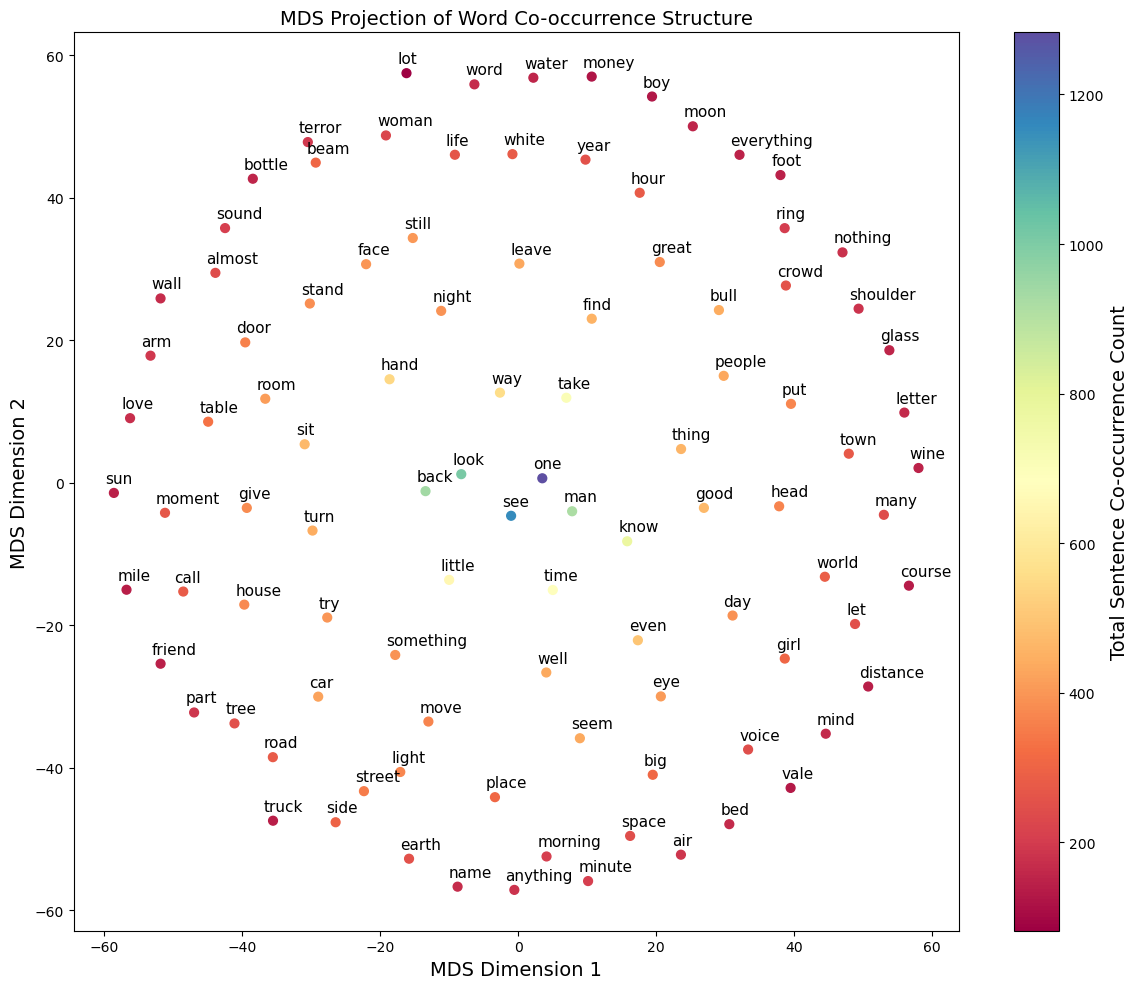

In [31]:
# The function compute_sentence_cooccurrence calculates the number of times each word pair co-occurs in a sentence.
def compute_sentence_cooccurrence(L, all_sentences_2):
    """
    Computes the frequency with which each pair of words in L co-occurs in the same sentence.

    :param L: list of ~100 selected words.
    :param all_sentences_2: list of sentences, each sentence is a list of tuples
        (lemma, upos, sid, pos_in_sent, gpos).
    :return: cooccur_dict, a dictionary keyed by (w1, w2) -> cooccurrence_count
    """
    # Convert L to a set for faster membership checks
    word_set = set(L)
    # Prepare a dictionary to store co-occurrence counts for each pair
    sent_cooccurrences = defaultdict(int)
    
    # Loop through every sentence in the corpus
    for sent in all_sentences_2:
        # Build a set of unique words from L found in this sentence
        present_words = set()
        # For each token in the sentence, check if the lemma is in our word set
        for (lemma, upos, sid, pos_in_sent, gpos) in sent:
            if lemma in word_set:
                present_words.add(lemma)
        
        # Generate all unique pairs of words present in this sentence
        for (w1, w2) in itertools.combinations(sorted(present_words), 2):
            # Increment the co-occurrence count for each pair
            sent_cooccurrences[(w1, w2)] += 1
    
    # Return the final dictionary of pair -> co-occurrence counts
    return sent_cooccurrences

# The function print_cooccurrence_results_df prints the most and least frequent co-occurring pairs
def print_cooccurrence_results_df(cooccur_dict, top_n=5):
    """
    Converts the co-occurrence dictionary into two DataFrames:
    - top_n most frequent pairs
    - bottom_n least frequent pairs
    Displays both with index hidden using .style.
    """
    # If the dictionary is empty, inform the user
    if not cooccur_dict:
        print("No co-occurrence data found.")
        return None, None

    # Convert the co-occurrence data into a list of dictionaries for a DataFrame
    data = []
    for (w1, w2), count in cooccur_dict.items():
        data.append({"Word 1": w1, "Word 2": w2, "Co-occurrence Frequency": count})
    # Create a DataFrame from the list
    df_all = pd.DataFrame(data)
    # Sort values by co-occurrence frequency in descending order
    df_all.sort_values(by="Co-occurrence Frequency", ascending=False, inplace=True)

    # Keep track of total pairs for reference
    total_pairs = len(df_all)
    # top_df: the highest co-occurrence pairs
    top_df = df_all.head(top_n).reset_index(drop=True)
    # bottom_df: the lowest co-occurrence pairs
    bottom_df = df_all.tail(top_n).reset_index(drop=True)

    # Print and display the top N pairs
    print(f"\nTop {top_n} pairs by co-occurrence (most frequent in same sentence):")
    display(top_df.style.hide(axis="index"))

    # Print and display the bottom N pairs
    print(f"\nBottom {top_n} pairs by co-occurrence (least frequent in same sentence):")
    display(bottom_df.style.hide(axis="index"))

    # Return references to both DataFrames
    return top_df, bottom_df

# Convert a pairwise co-occurrence dictionary into a full matrix for visualization
def build_cooccur_matrix(L, cooccur_dict):
    """
    Converts the dictionary mapping (w1, w2) -> cooccurrence_count 
    into an NxN numpy matrix, where matrix[i, j] represents the 
    number of times word w_i co-occurs with word w_j in the same sentence.
    
    Parameters:
    -----------
    L : list
        A list of words.
    cooccur_dict : dict
        A dictionary whose keys are (word1, word2) pairs and values are 
        the frequency of co-occurrence.

    Returns:
    --------
    mat : numpy.ndarray
        An NxN matrix of co-occurrence counts.
    sorted_words : list
        The list of words sorted in alphabetical order. Indices in mat 
        correspond to positions of these sorted words.
    """
    # Sort the word list to ensure consistent ordering
    L_sorted = sorted(L)
    # Create a dictionary to map each word to its index in the sorted list
    idx_map = {w: i for i, w in enumerate(L_sorted)}
    # Initialize an NxN zero matrix
    N = len(L_sorted)
    mat = np.zeros((N, N), dtype=float)

    # Populate the matrix with co-occurrence frequencies
    for (w1, w2), freq in cooccur_dict.items():
        if w1 in idx_map and w2 in idx_map:
            i = idx_map[w1]
            j = idx_map[w2]
            mat[i, j] = freq
            mat[j, i] = freq  # Symmetry ensures matrix is mirrored across the diagonal

    return mat, L_sorted

# Visualizes word co-occurrence Structure by using MDS
def plot_mds_cooccurrence_colorful(cooccur_dict, L, random_state=42):
    # Build the co-occurrence matrix and an ordered list of words
    cooccur_mat, sorted_words = build_cooccur_matrix(L, cooccur_dict)
    
    # If there are fewer than two words, we cannot visualize anything
    if len(sorted_words) < 2:
        print("Not enough words to visualize.")
        return
    
    # Find the maximum frequency within the co-occurrence matrix
    max_freq = cooccur_mat.max()
    # Convert co-occurrence frequencies into distances by subtracting from max_freq and adding a small offset
    dist_mat = (max_freq - cooccur_mat) + 1e-6

    # Create an MDS model that uses the precomputed distance matrix, with a specified random state
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state, normalized_stress='auto')
    # Fit the MDS model and obtain 2D coordinates for each word
    coords = mds.fit_transform(dist_mat)

    # Sum each row of the co-occurrence matrix to get the total frequency for each word
    row_sums = cooccur_mat.sum(axis=1)
    
    # Initialize a new figure for the scatter plot
    plt.figure(figsize=(12,10))
    # Generate a scatter plot using row_sums for color, applying the "Spectral" colormap
    sc = plt.scatter(
        coords[:, 0], coords[:, 1],
        c=row_sums,
        cmap="Spectral",
        s=40
    )

    # For each word, place a text label slightly offset from its scatter point
    for i, w in enumerate(sorted_words):
        plt.text(coords[i, 0] - 1.3, coords[i, 1] + 1.4, w, fontsize=11)

    # Set an informative title and label the axes
    plt.title("MDS Projection of Word Co-occurrence Structure", fontsize=14)
    plt.xlabel("MDS Dimension 1", fontsize=14)
    plt.ylabel("MDS Dimension 2", fontsize=14)

    # Create a colorbar indicating the total co-occurrence frequency (row sum)
    cb = plt.colorbar(sc)
    cb.set_label("Total Sentence Co-occurrence Count", fontsize=14)

    # Adjust the layout to avoid clipping elements
    plt.tight_layout()
    # Display the plot on the screen
    plt.show()

# Execute the co-occurrence computations for the current word list L and unified sentences all_sentences_2
cooccur_dict = compute_sentence_cooccurrence(L, all_sentences_2)
top_df, bottom_df = print_cooccurrence_results_df(cooccur_dict, top_n=5)

print("\nVisualization of Word Relationships Based on Sentence Co-occurrence:\n")
plot_mds_cooccurrence_colorful(cooccur_dict, L, random_state=42)

#### Phase 3.2: Global Position-Based Distance Metrics

We measure the typical distance between each pair of words across the text. By converting each word’s token occurrences into a list of global positions, we calculate the average distance between every pair. Smaller average distance suggests the words are often found near each other, whereas larger distance indicates they typically occur far apart in the text.


Closest 5 pairs by average distance (smallest values):



Furthest 5 pairs by average distance (largest values):



Visualization of Word Relationships Based on Token-Level Positional Structure:



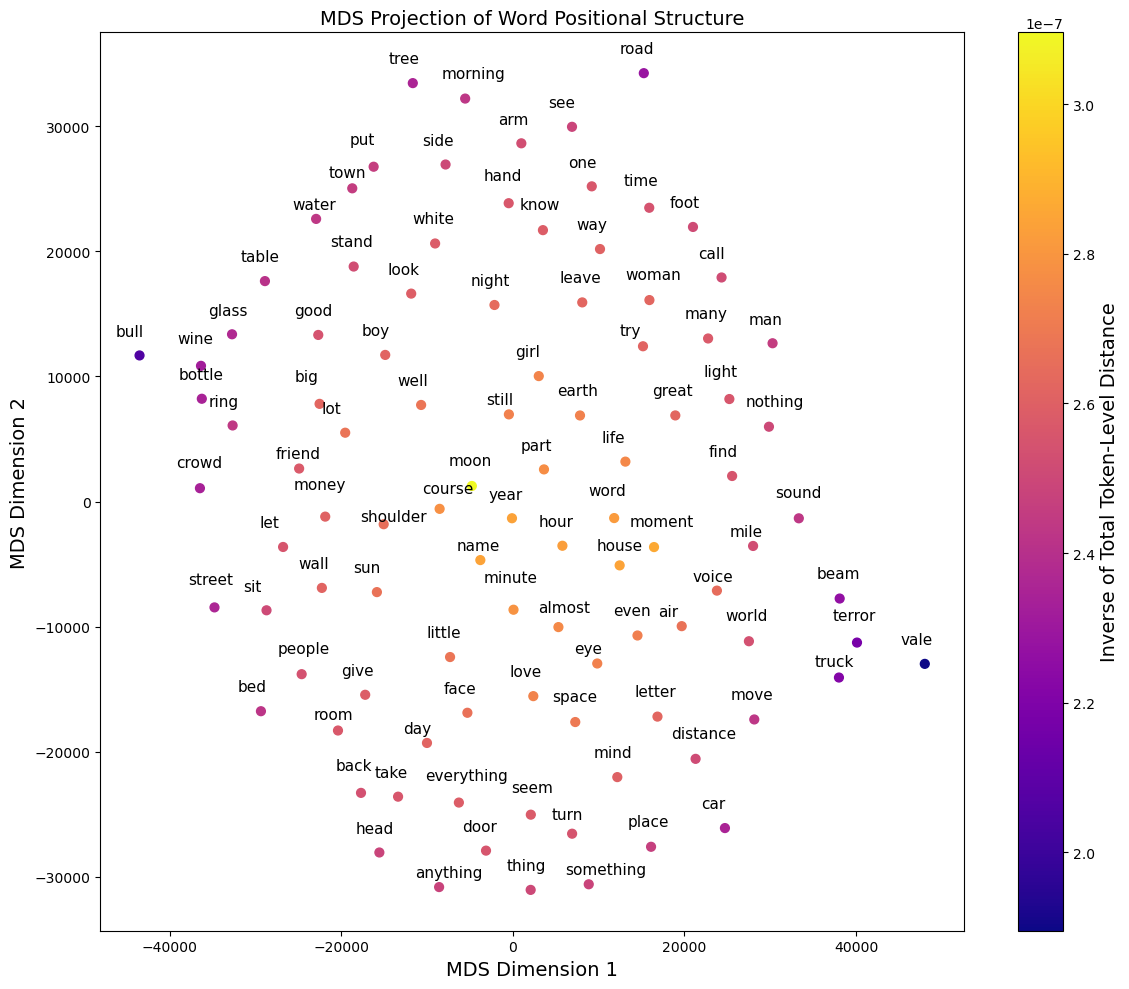

In [35]:
# The function build_global_positions_map records the global positions (gpos) of each lemma across the corpus
def build_global_positions_map(all_sentences_2):
    """
    Returns a dictionary of the form:
      { lemma -> [sorted list of global positions (gpos)] }
    """
    # Create a dictionary mapping each lemma to a list of positions
    positions_map = defaultdict(list)
    # Loop through every sentence
    for sent in all_sentences_2:
        # Loop through every token in the sentence
        for (lemma, upos, sid, pos_in_sent, gpos) in sent:
            # Append the global token ID (gpos) to the lemma's list
            positions_map[lemma].append(gpos)
    # Sort each lemma's position list so we can compute distances easily
    for lemma in positions_map:
        positions_map[lemma].sort()
    # Return the final positions map
    return positions_map

# The function compute_average_distance calculates the mean distance between positions of every pair of words
def compute_average_distance(L, positions_map):
    """
    For each pair (w1, w2) in L, compute the average distance in the entire text.

    :param L: list of ~100 words
    :param positions_map: { lemma -> [sorted gpos values] }
    :return: dist_dict: (w1, w2) -> avg_distance (float)
             Excludes pairs if no co-occurrences exist (or one word doesn't appear).
    """
    # Prepare a dictionary for distances
    dist_dict = {}
    # Sort L so pairs are consistent
    L_sorted = sorted(L)
    
    # Double nested loop over word pairs
    for i in range(len(L_sorted)):
        for j in range(i+1, len(L_sorted)):
            w1 = L_sorted[i]
            w2 = L_sorted[j]
            # Retrieve the global positions for each word
            pos_list_1 = positions_map.get(w1, [])
            pos_list_2 = positions_map.get(w2, [])
            
            # If either word doesn't appear, skip
            if not pos_list_1 or not pos_list_2:
                continue
            
            # Compute the total distance across all pairs of positions
            sum_dist = 0
            count_pairs = 0
            for p1 in pos_list_1:
                for p2 in pos_list_2:
                    sum_dist += abs(p2 - p1)
                    count_pairs += 1
            
            # If we have at least one valid pair, compute average
            if count_pairs > 0:
                avg_dist = sum_dist / count_pairs
                dist_dict[(w1, w2)] = avg_dist
    
    # Return the dictionary mapping word pairs to average distance
    return dist_dict

# Define a function to print the closest and furthest word pairs by average distance
def print_distance_results_df(dist_dict, top_n=5):
    """
    Converts the average distance dictionary into two DataFrames:
    - top_n closest pairs
    - top_n furthest pairs
    Displays both using pandas with hidden index, and formats distance as integer.
    """
    # If no distance data is computed, inform the user
    if not dist_dict:
        print("No distance data computed (perhaps no overlapping words in the text).")
        return None, None

    # Convert the distance dictionary to a list of dictionaries
    data = []
    for (w1, w2), dist_val in dist_dict.items():
        data.append({"Word 1": w1, "Word 2": w2, "Average Distance": dist_val})
    # Build a DataFrame from these entries
    df_all = pd.DataFrame(data)
    # Sort ascending by distance so the smallest distances are at the top
    df_all.sort_values(by="Average Distance", ascending=True, inplace=True)

    # Take the top N as the closest pairs
    top_df = df_all.head(top_n).reset_index(drop=True)
    # Take the bottom N as the furthest pairs
    bottom_df = df_all.tail(top_n).reset_index(drop=True)

    # Print the closest pairs (rounded display to integer)
    print(f"\nClosest {top_n} pairs by average distance (smallest values):")
    display(top_df.style.format({"Average Distance": "{:.0f}"}).hide(axis="index"))

    # Print the furthest pairs (rounded display to integer)
    print(f"\nFurthest {top_n} pairs by average distance (largest values):")
    display(bottom_df.style.format({"Average Distance": "{:.0f}"}).hide(axis="index"))

    # Return references to the DataFrames
    return top_df, bottom_df


# Build a symmetric distance matrix from pairwise distance dictionary for word list L
def build_distance_matrix(L, dist_dict, default_distance=9999.0):
    """
    Converts (w1,w2)->distance dictionary into a full NxN matrix.
    """
    # Sort the list of words for consistent indexing
    L_sorted = sorted(L)
    # Map each word to its index in the sorted list
    idx_map = {w: i for i, w in enumerate(L_sorted)}
    # Determine the size of the matrix
    N = len(L_sorted)
    # Initialize the distance matrix with a default fill value
    mat = np.full((N, N), default_distance, dtype=float)
    # Set the diagonal elements to zero (distance from a word to itself)
    np.fill_diagonal(mat, 0.0)
    
    # Populate the matrix using the given distance dictionary
    for (w1, w2), dist in dist_dict.items():
        if w1 in idx_map and w2 in idx_map:
            i = idx_map[w1]
            j = idx_map[w2]
            mat[i, j] = dist
            mat[j, i] = dist  # Ensure the matrix is symmetric
    
    # Return the completed matrix and the sorted word list
    return mat, L_sorted

# Projects word relationships into 2D using MDS based on token-level average distances, with labeled scatter plot
def plot_mds_from_position_distance(dist_dict, L, random_state=123):
    """
    Visualizes word positions using MDS based on average token-level distances,
    with enhanced label adjustment using expand/force parameters.
    """
    # Build a full distance matrix and retrieve the sorted word list
    dist_mat, sorted_words = build_distance_matrix(L, dist_dict, default_distance=9999.0)
    
    # Apply multidimensional scaling (MDS) using the distance matrix
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state)
    coords = mds.fit_transform(dist_mat)

    # Compute total distance from each word to all others (row sums)
    row_sums = np.where(dist_mat.sum(axis=1) == 0, 1e-6, dist_mat.sum(axis=1))
    # Compute the inverse of total distance to use as color (higher closeness => more connected)
    closeness = 1 / row_sums

    # Initialize a matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 10))
    # Create a scatter plot of the MDS coordinates, colored by closeness
    sc = ax.scatter(
        coords[:, 0], coords[:, 1],
        c=closeness,
        cmap="plasma",
        s=40
    )

    # Compute small positional offsets for label placement
    x_range = coords[:, 0].max() - coords[:, 0].min()
    y_range = coords[:, 1].max() - coords[:, 1].min()
    x_offset = x_range * 0.03
    y_offset = y_range * 0.02

    # Add a text label near each point using the sorted word list
    texts = [
        ax.text(coords[i, 0] - x_offset, coords[i, 1] + y_offset, word, fontsize=11)
        for i, word in enumerate(sorted_words)
    ]

    # Automatically adjust text positions to reduce overlap
    adjust_text(texts, ax=ax)

    # Set plot title and axis labels
    ax.set_title("MDS Projection of Word Positional Structure", fontsize=14)
    ax.set_xlabel("MDS Dimension 1", fontsize=14)
    ax.set_ylabel("MDS Dimension 2", fontsize=14)

    # Add a colorbar to explain color scale (inverse distance)
    cb = plt.colorbar(sc, ax=ax)
    cb.set_label("Inverse of Total Token-Level Distance", fontsize=14)

    # Show the final plot
    plt.tight_layout()
    plt.show()

# Build the positions map from the unified sentences
positions_map = build_global_positions_map(all_sentences_2)
# Compute average distance among all word pairs in L
dist_dict = compute_average_distance(L, positions_map)
# Print the closest and furthest pairs by average distance
top_df, bottom_df = print_distance_results_df(dist_dict, top_n=5)
# Generate plot
print("\nVisualization of Word Relationships Based on Token-Level Positional Structure:\n")
plot_mds_from_position_distance(dist_dict, L, random_state=123) 

#### Phase 3.3: Computing and Visualizing Sentence-Level Word Pair Distances

We compute the local syntactic distance between word pairs based on their co-occurrence within sentences.

For each pair of words in the selected vocabulary L, we determine whether they co-occur in a sentence and, if so, calculate their average position difference (i.e., "sentence-local distance"). Pairs that never co-occur are assigned a default large distance. These distances are stored in a dictionary, converted into a matrix, and then used to print the top-N closest and furthest word pairs based on average distance.

In [57]:
# Compute average local distance between word pairs across all sentences
def compute_sentence_local_distance(L, all_sentences_2, default_distance=9999.0):
    """
    For each pair of words (w1, w2) in L, we only consider the cases where
    w1 and w2 BOTH appear in the same sentence. Within such a sentence,
    we measure the 'local distance' as the absolute difference of their
    pos_in_sent indices. We then average these local distances across all
    sentences in which they co-occur.

    - If two words NEVER co-occur in any sentence, we assign distance=9999.0
      (or the specified default_distance).

    :param L: list of words (~100)
    :param all_sentences_2: The list of sentences, each is a list of tuples:
        (lemma, upos, sid, pos_in_sent, gpos)
    :param default_distance: The distance value for word pairs that never
        appear in the same sentence
    :return: dist_dict_sentence_local: A dict {(w1, w2): local_dist},
        storing the average local distance for each pair
    """
    # Sort the list L to have consistent ordering of words
    L_sorted = sorted(L)
    word_set = set(L_sorted)

    # Dictionaries to accumulate sum of distances and count of co-occurrences
    pair_sum = defaultdict(float)
    pair_count = defaultdict(int)

    # Iterate over every sentence in the corpus
    for sent in all_sentences_2:
        # Collect tokens relevant to L by checking if the lemma is in word_set
        relevant_tokens = []
        for (lemma, upos, sid, pos_in_sent, gpos) in sent:
            if lemma in word_set:
                relevant_tokens.append((lemma, pos_in_sent))

        # If fewer than two relevant tokens, no pairs can be formed in this sentence
        if len(relevant_tokens) < 2:
            continue

        # Consider each unique pair of relevant tokens in this sentence
        for i in range(len(relevant_tokens)):
            for j in range(i + 1, len(relevant_tokens)):
                w1, pos_i = relevant_tokens[i]
                w2, pos_j = relevant_tokens[j]

                # Sort the pair alphabetically to ensure a consistent key
                pair_key = tuple(sorted([w1, w2]))
                # Compute the local distance as absolute difference of pos_in_sent
                local_dist = abs(pos_i - pos_j)

                # Accumulate the sum of distances for this pair
                pair_sum[pair_key] += local_dist
                # Increase the co-occurrence count for this pair
                pair_count[pair_key] += 1

    # Final dictionary to store the average local distance for each pair
    dist_dict_sentence_local = {}
    # Double loop over words in L_sorted to define all possible pairs
    for w1 in L_sorted:
        for w2 in L_sorted:
            if w1 >= w2:
                continue
            pair_key = (w1, w2)

            # If the pair co-occurred at least once, compute average distance
            if pair_key in pair_count:
                cval = pair_count[pair_key]
                sval = pair_sum[pair_key]
                avg_local = sval / cval
                dist_dict_sentence_local[pair_key] = avg_local
            else:
                # If never co-occurred, assign the default large distance
                dist_dict_sentence_local[pair_key] = default_distance

    return dist_dict_sentence_local

# Print the closest and furthest word pairs by local sentence distance
def print_distance_results_df(
    dist_dict_sentence_local, top_n=5,
    force_include_top=[("morning", "great")],
    force_include_bottom=[("glass", "house"), ("move", "water")]
):
    """
    Converts the distance dictionary into two DataFrames:
    - top_n closest pairs
    - top_n furthest pairs
    Displays both using pandas with hidden index.

    - Additionally allows manually forcing certain word pairs to appear
      in the top or bottom N, even if there are ties.

    :param dist_dict_sentence_local: dict {(w1, w2): distance} (local or global)
    :param top_n: the number of pairs to display for closest/furthest
    :param force_include_top: list of (w1, w2) pairs to force into closest pairs
    :param force_include_bottom: list of (w1, w2) pairs to force into furthest pairs
    :return: (top_df, bottom_df) references to the printed DataFrames
    """
    if not dist_dict_sentence_local:
        print("No distance data computed.")
        return None, None

    # Convert the distance dictionary to a list of dictionaries
    data = []
    for (w1, w2), dist_val in dist_dict_sentence_local.items():
        data.append({"Word 1": w1, "Word 2": w2, "Distance": dist_val})

    # Build a DataFrame
    df_all = pd.DataFrame(data)

    # Sort word pairs consistently to match force-inclusion keys
    def canonical_pair(w1, w2):
        return tuple(sorted([w1, w2]))

    # Add helper column for canonical word pair
    df_all["pair"] = df_all.apply(lambda row: canonical_pair(row["Word 1"], row["Word 2"]), axis=1)

    # Create sets of canonical forced pairs
    force_top_set = set(canonical_pair(w1, w2) for w1, w2 in force_include_top)
    force_bottom_set = set(canonical_pair(w1, w2) for w1, w2 in force_include_bottom)

    # Select rows that must be included in top and bottom output
    top_df_forced = df_all[df_all["pair"].isin(force_top_set)]
    bottom_df_forced = df_all[df_all["pair"].isin(force_bottom_set)]

    # Sort full DataFrame by distance
    df_all_sorted = df_all.sort_values(by="Distance", ascending=True)

    # Remove forced pairs from main table to avoid duplication
    df_top_rest = df_all_sorted[~df_all_sorted["pair"].isin(force_top_set)]
    df_bottom_rest = df_all_sorted[~df_all_sorted["pair"].isin(force_bottom_set)]

    # Top N = closest pairs (including forced ones)
    top_df = pd.concat([top_df_forced, df_top_rest.head(top_n - len(top_df_forced))])
    top_df = top_df.drop(columns="pair").reset_index(drop=True)

    # Bottom N = furthest pairs (including forced ones)
    bottom_df = pd.concat([bottom_df_forced, df_bottom_rest.tail(top_n - len(bottom_df_forced))])
    bottom_df = bottom_df.sort_values(by="Distance", ascending=False).drop(columns="pair").reset_index(drop=True)

    # Display the closest pairs
    print(f"\nClosest {top_n} pairs by sentence local distance:")
    display(top_df.style.hide(axis="index"))

    # Display the furthest pairs
    print(f"\nFurthest {top_n} pairs by sentence local distance:")
    display(bottom_df.style.hide(axis="index"))

    return top_df, bottom_df

# Build a square distance matrix for use in clustering or visualization
def build_distance_matrix(L, dist_dict_sentence_local, default_distance=9999.0):
    """
    Converts (w1, w2)->distance dictionary into a full NxN matrix.

    :param L: list of words
    :param dist_dict_sentence_local: dict {(w1, w2): distance}
    :param default_distance: default fill for missing pairs
    :return: (mat, L_sorted) => NxN distance matrix, sorted word list
    """
    L_sorted = sorted(L)
    idx_map = {w: i for i, w in enumerate(L_sorted)}
    N = len(L_sorted)

    mat = np.full((N, N), default_distance, dtype=float)
    np.fill_diagonal(mat, 0.0)

    for (w1, w2), dist_val in dist_dict_sentence_local.items():
        if w1 in idx_map and w2 in idx_map:
            i = idx_map[w1]
            j = idx_map[w2]
            mat[i, j] = dist_val
            mat[j, i] = dist_val

    return mat, L_sorted

# Compute local sentence distance among all word pairs in L
dist_dict_sentence_local = compute_sentence_local_distance(L, all_sentences_2, default_distance=9999.0)

# Print the closest and furthest pairs by average local distance
top_df_sentence_local, bottom_df_sentence_local = print_distance_results_df(dist_dict_sentence_local, top_n=5)


Closest 5 pairs by sentence local distance:



Furthest 5 pairs by sentence local distance:


### Phase 4: Clustering Evaluation with Distance Matrices

We integrate normalized distance matrices derived from pairwise word relationships into multiple clustering workflows.
We apply both hierarchical clustering (using different linkage methods) and K-Means clustering, and evaluate the resulting groupings using standard metrics such as silhouette scores and inertia (for K-Means). By systematically adjusting parameters—linkage method for hierarchical clustering and number of clusters (k) for K-Means—we identify the optimal clustering configurations for each approach.

Hierarchical clustering experiments include comparisons among single, complete, and average linkage methods, while K-Means clustering is explored across a range of cluster numbers (k = 3 to 10) to investigate model stability and partitioning quality.


Evaluating Hierarchical Clustering using Single linkage with k = 5:


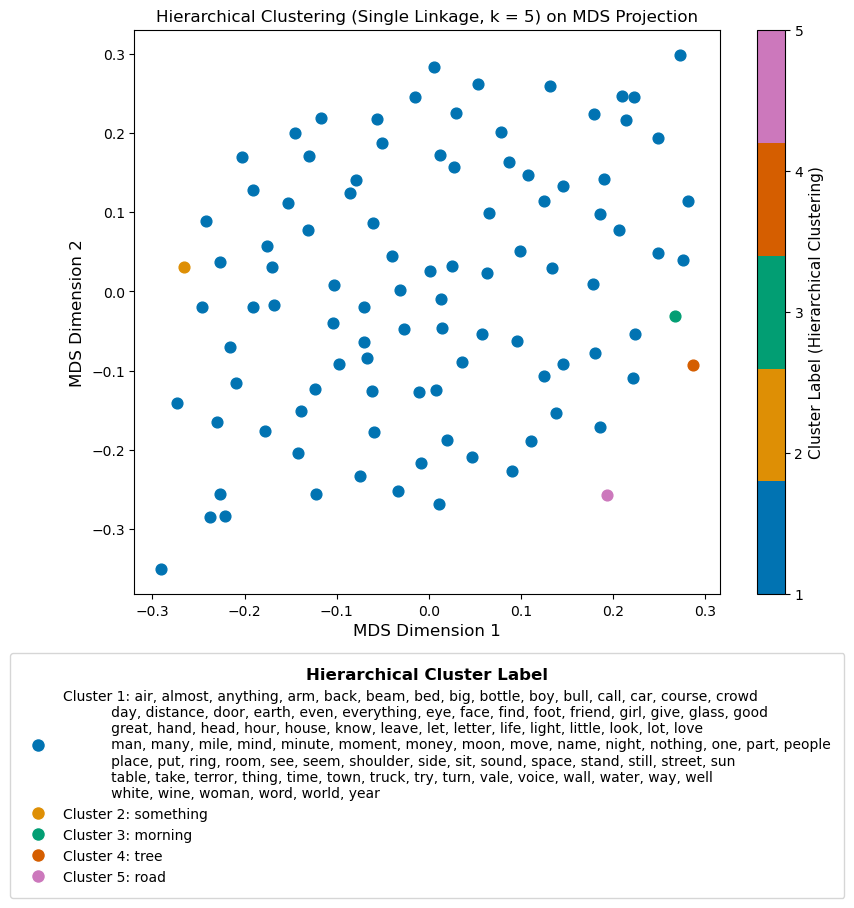


Evaluating Hierarchical Clustering using Complete linkage with k = 5:


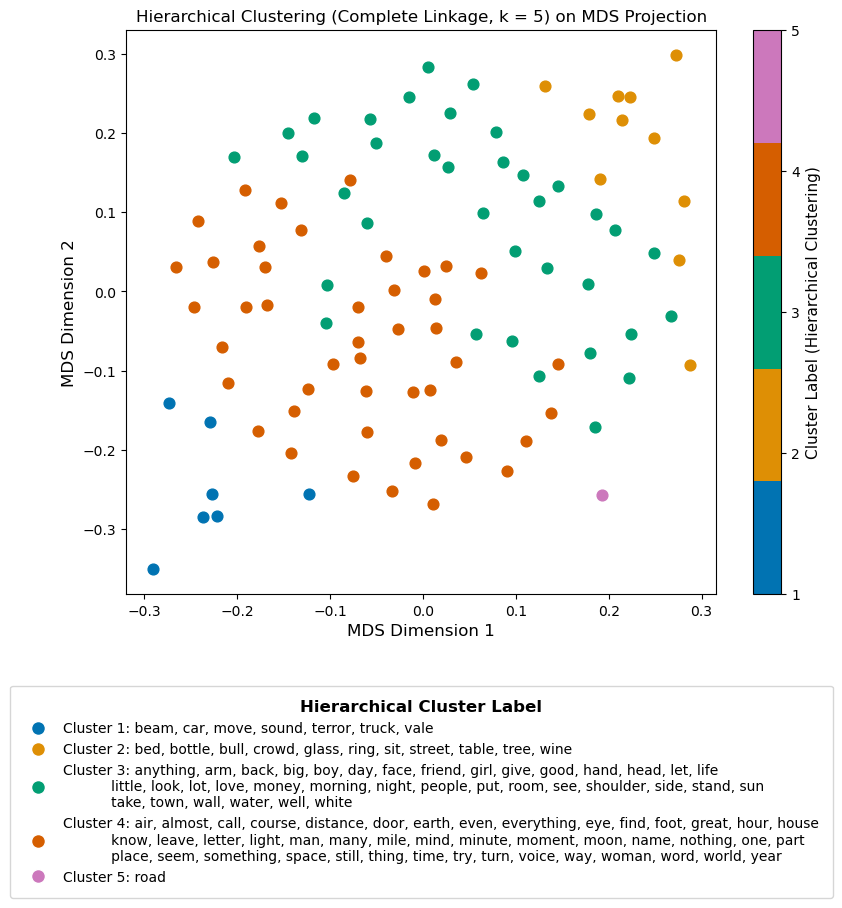


Evaluating Hierarchical Clustering using Average linkage with k = 5:


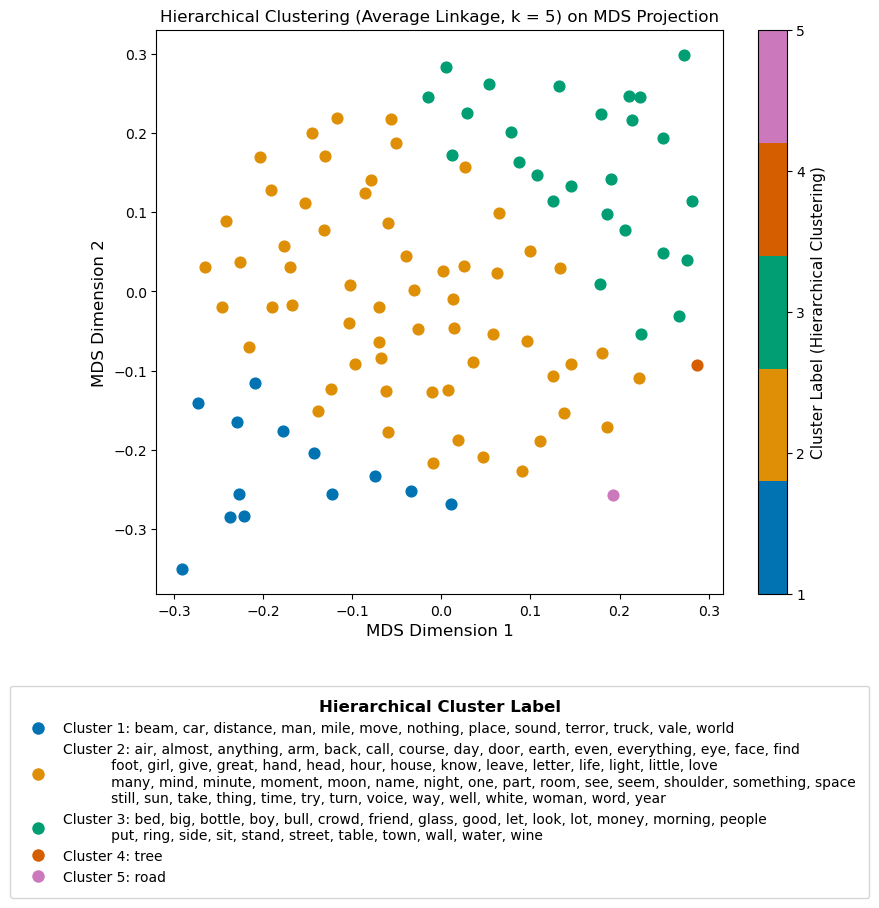


Hierarchical Clustering Evaluation Summary:


Linkage Method  Silhouette Score
0        average            0.1045
1       complete            0.0712
2         single            0.0043

Optimal Linkage for Hierarchical = average (Silhouette Score=0.1045)
--------------------------------------------------------------------------------

Evaluating K-Means Clustering on MDS Projection with k = 3:



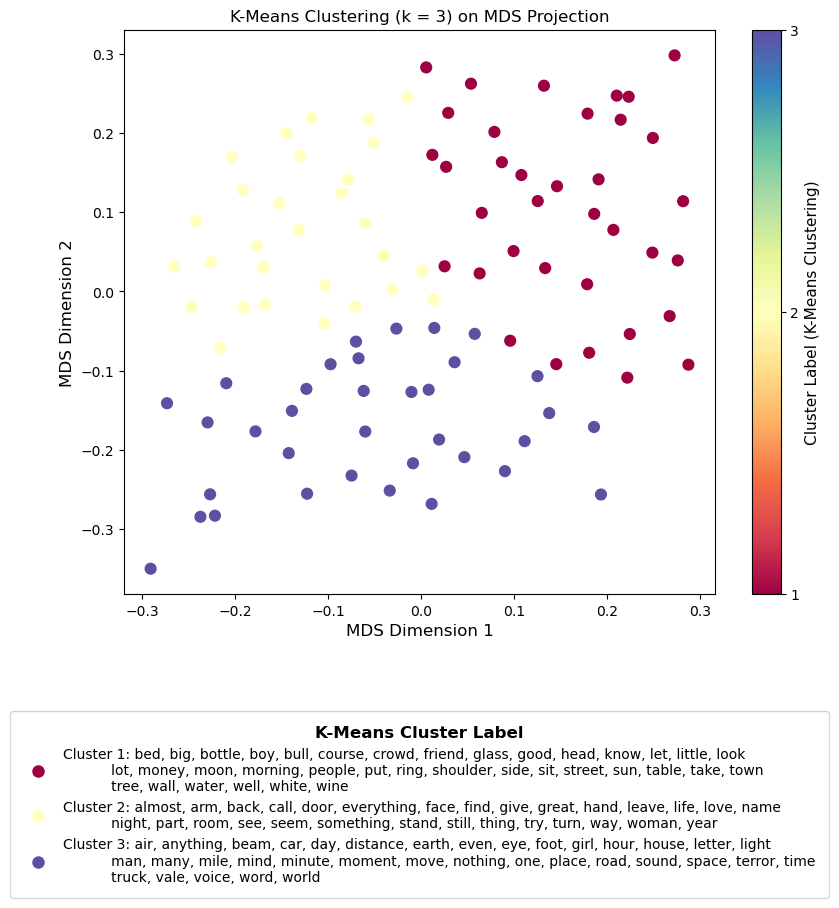


Evaluating K-Means Clustering on MDS Projection with k = 4:



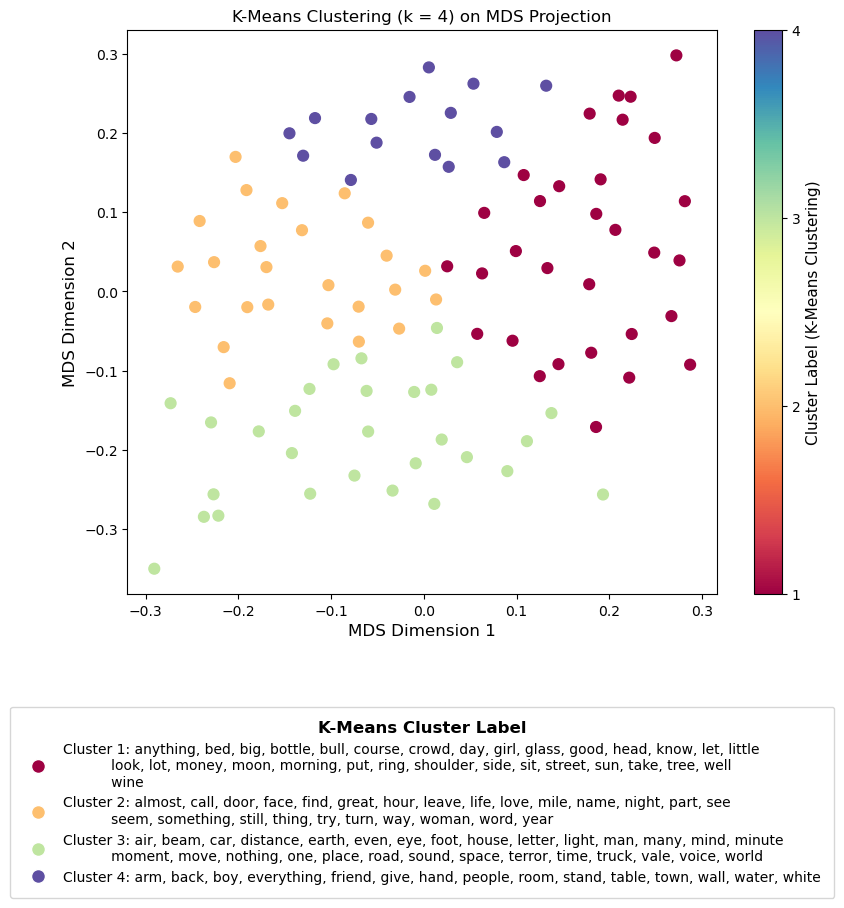


Evaluating K-Means Clustering on MDS Projection with k = 5:



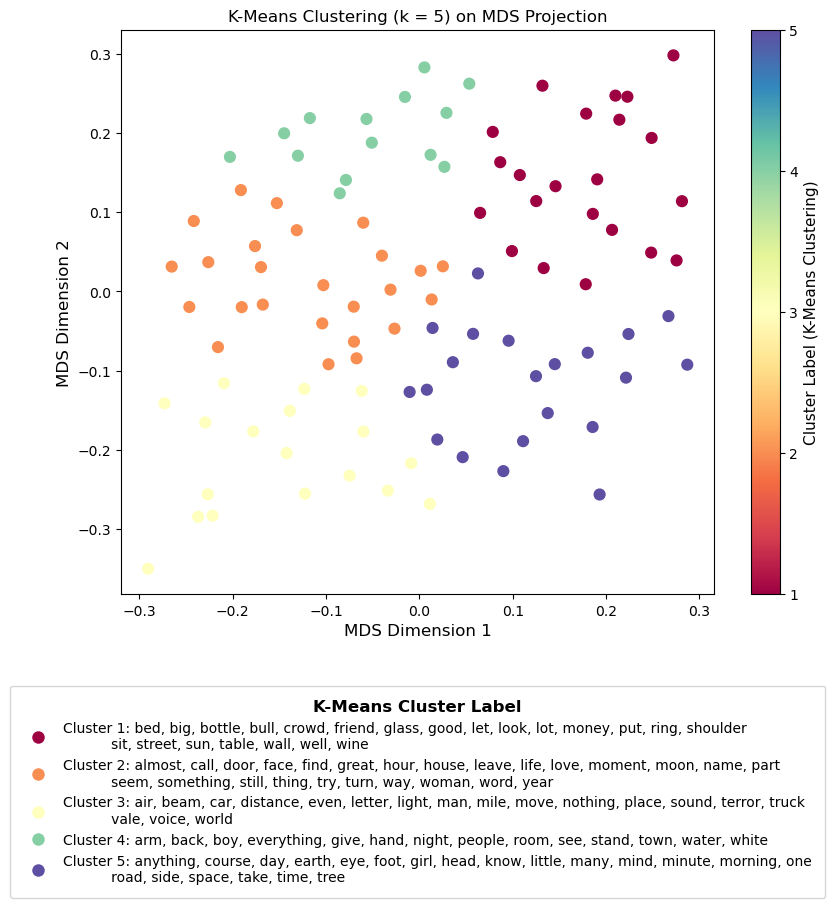


Evaluating K-Means Clustering on MDS Projection with k = 6:



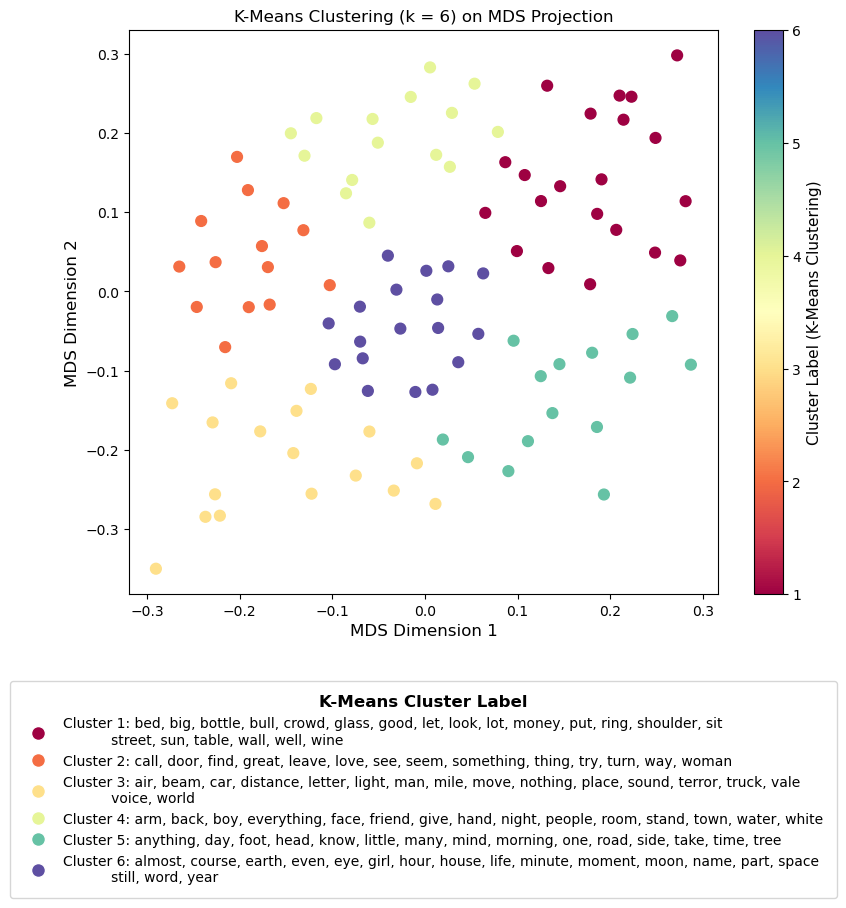


Evaluating K-Means Clustering on MDS Projection with k = 7:



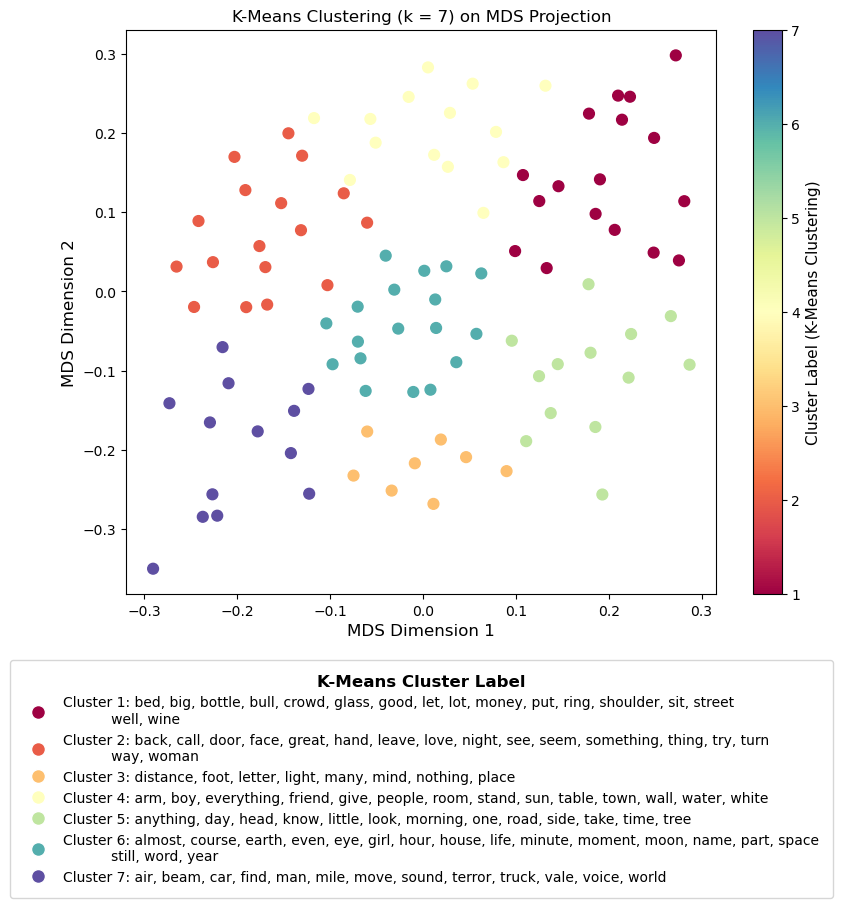


Evaluating K-Means Clustering on MDS Projection with k = 8:



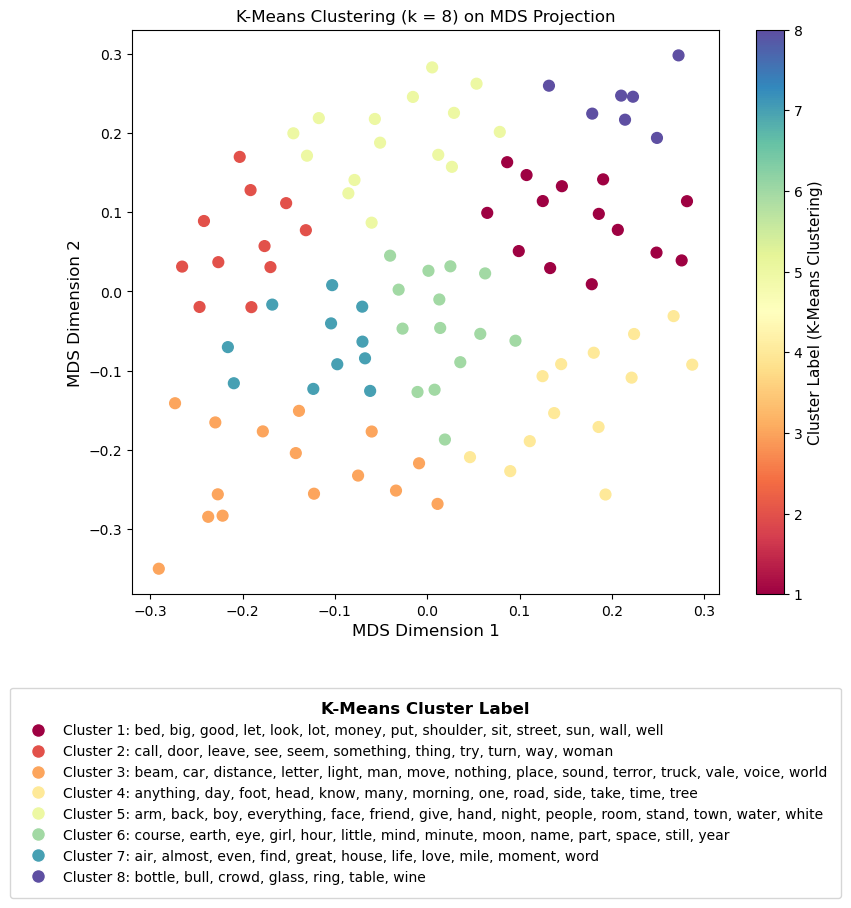


Evaluating K-Means Clustering on MDS Projection with k = 9:



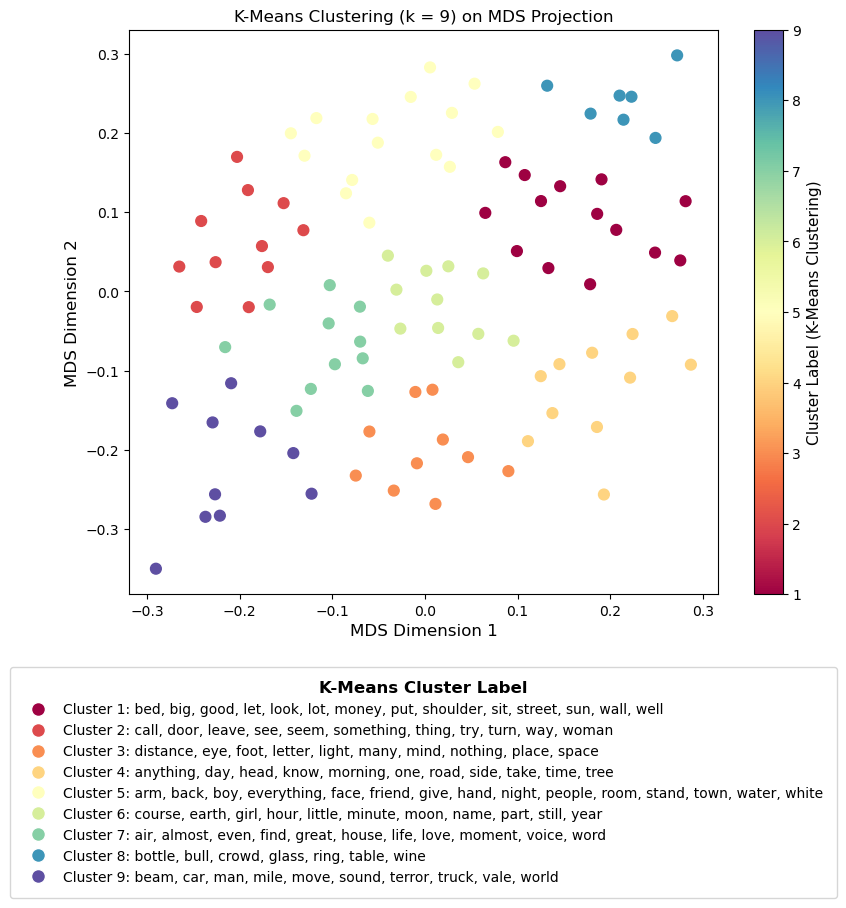


Evaluating K-Means Clustering on MDS Projection with k = 10:



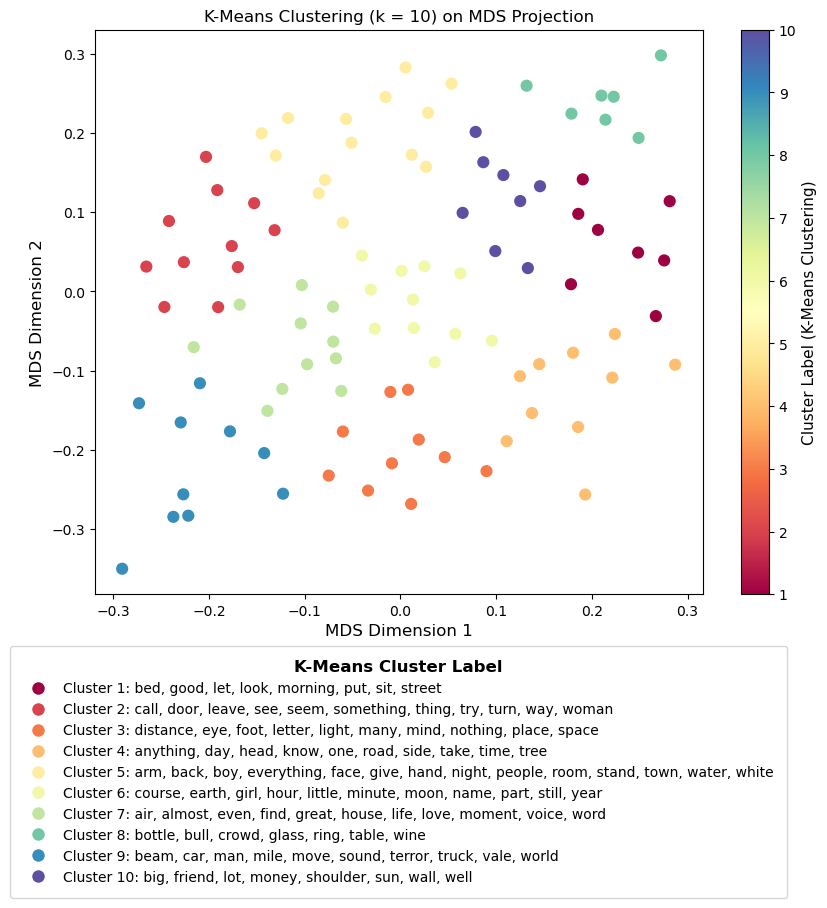

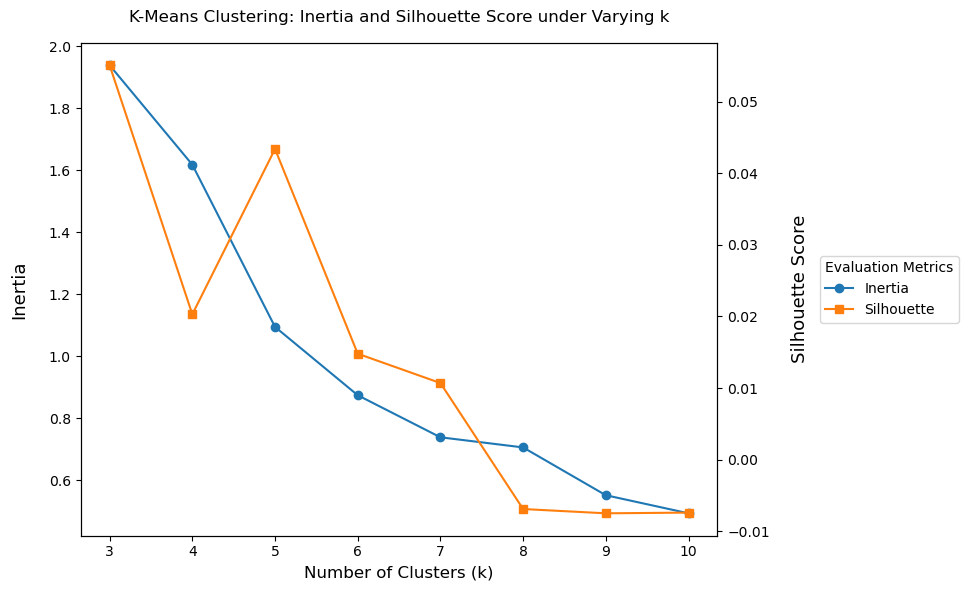


K-Means Clustering Evaluation Summary:


k  Inertia  Silhouette Score
0   3   1.9388            0.0551
1   4   1.6179            0.0203
2   5   1.0946            0.0434
3   6   0.8741            0.0148
4   7   0.7384            0.0107
5   8   0.7057           -0.0069
6   9   0.5515           -0.0075
7  10   0.4931           -0.0074

Optimal k for K-Means = 3 (Silhouette Score=0.0551)


In [62]:
# Normalize the distance matrix to the [0, 1] interval, excluding diagonal zeroes
def normalize_distance_matrix(dist_mat):
    """
    Min-max normalizes the distance matrix to [0, 1] range,
    ignoring the diagonal values (kept at 0.0).
    """
    # Make a copy of the distance matrix so we don't modify the original
    dist_copy = dist_mat.copy()
    
    # Create a boolean mask for nonzero entries (diagonal remains 0)
    mask = dist_copy != 0
    
    # Calculate the minimum value among non-diagonal entries
    min_val = dist_copy[mask].min()
    # Calculate the maximum value among non-diagonal entries
    max_val = dist_copy[mask].max()
    
    # Compute the range, protecting against max_val == min_val
    range_val = max_val - min_val if max_val > min_val else 1.0
    # Perform min-max normalization
    norm_mat = (dist_copy - min_val) / range_val
    # For positions where mask is False (e.g., diagonal or absent distances), set to 0.0
    norm_mat[~mask] = 0.0
    # Return the normalized distance matrix
    return norm_mat

# Build an NxN distance matrix for the list of words, filling unknown pairs with default_distance
def build_distance_matrix(L, dist_dict, default_distance=9999.0):
    """
    Build an NxN distance matrix (and word_index_map) given:
      - L: list of words
      - dist_dict: dictionary {(w1, w2): distance}
      - default_distance: fill value for missing pairs
    """
    # Sort the list of words to fix a consistent ordering
    L_sorted = sorted(L)
    # Determine the size of the matrix
    N = len(L_sorted)
    # Build a map from word -> matrix index
    word_index_map = {w: i for i, w in enumerate(L_sorted)}
    # Initialize the matrix with the default distance
    dist_mat = np.full((N, N), default_distance, dtype=float)
    # Set the diagonal to 0.0
    np.fill_diagonal(dist_mat, 0.0)
    
    # Populate the matrix using values from dist_dict
    for (w1, w2), dist_val in dist_dict.items():
        if w1 in word_index_map and w2 in word_index_map:
            i = word_index_map[w1]
            j = word_index_map[w2]
            dist_mat[i, j] = dist_val
            dist_mat[j, i] = dist_val
    # Return the distance matrix and the word-to-index map
    return dist_mat, word_index_map

# Plot data points in 2D using MDS from a distance matrix, then applies hierarchical clustering for labeling
def plot_mds_with_hierarchical_labels(dist_mat, L, linkage_method="average", num_clusters=5, random_state=42):
    """
    Perform MDS + Hierarchical clustering:
    - Projects data to 2D using MDS on distance matrix
    - Applies hierarchical clustering with given linkage method
    - Plots points colored by cluster (1..num_clusters)
    - Displays custom legend with:
        - Colored round marker
        - "Cluster N:" followed by 15-word-wrapped aligned lines
    """
    # Create an MDS model with precomputed distances and a given random seed
    mds_model = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state, normalized_stress='auto')
    # Fit the MDS model and extract the 2D coordinates
    coords = mds_model.fit_transform(dist_mat)

    # Convert the NxN distance matrix into a condensed form for hierarchical
    condensed = squareform(dist_mat, checks=False)
    # Perform hierarchical clustering using the chosen linkage method
    Z = linkage(condensed, method=linkage_method)
    # Extract cluster labels in range [1..num_clusters]
    cluster_labels = fcluster(Z, t=num_clusters, criterion='maxclust')

    # Build a dictionary mapping each cluster label to a list of words
    cluster_to_words = defaultdict(list)
    for i, label in enumerate(cluster_labels):
        cluster_to_words[label].append(L[i])

    # Prepare a discrete color palette
    palette = sns.color_palette("colorblind", n_colors=num_clusters)
    # Convert to a ListedColormap
    cmap = ListedColormap(palette)

    # Create a figure and axes for the scatter plot
    fig, ax = plt.subplots(figsize=(9, 10))

    # For each cluster, pick out its points and plot them
    for cluster_id in sorted(cluster_to_words):
        idxs = [i for i, lbl in enumerate(cluster_labels) if lbl == cluster_id]
        cluster_coords = coords[idxs]
        ax.scatter(
            cluster_coords[:, 0],
            cluster_coords[:, 1],
            c=[cmap(cluster_id - 1)],
            s=60
        )

    # Set plot title and axes labels
    ax.set_title(f"Hierarchical Clustering ({linkage_method.capitalize()} Linkage, k = {num_clusters}) on MDS Projection", fontsize=12)
    ax.set_xlabel("MDS Dimension 1", fontsize=12)
    ax.set_ylabel("MDS Dimension 2", fontsize=12)

    # Create a colorbar for the hierarchical cluster labels
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=1, vmax=num_clusters), cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm, ticks=range(1, num_clusters + 1), ax=ax)
    cbar.set_label("Cluster Label (Hierarchical Clustering)", fontsize=11)

    # Build a legend that shows each cluster's words
    handles = []
    for cluster_id in sorted(cluster_to_words):
        words = cluster_to_words[cluster_id]
        color = cmap(cluster_id - 1)
        prefix = f"Cluster {cluster_id}: "
        lines = [prefix + ', '.join(words[:15])]
        indent = ' ' * len(prefix)
        for i in range(15, len(words), 15):
            lines.append(indent + ', '.join(words[i:i+15]))
        label = '\n'.join(lines)
        marker = Line2D([0], [0], marker='o', color='w',
                        markerfacecolor=color, markersize=10, label=label)
        handles.append(marker)

    legend = ax.legend(
        handles=handles,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.55),
        fontsize=10,
        frameon=True,
        fancybox=True,
        borderpad=1.0,
        ncol=1,
        title="Hierarchical Cluster Label"
    )
    legend.get_title().set_fontsize(12)
    legend.get_title().set_fontweight('bold')

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.4)
    plt.show()

    # Return the cluster labels for silhouette calculation or further analysis
    return cluster_labels

# Plot data points in 2D graph using MDS, then applies K-Means to label them, building a legend with the chosen k
def plot_mds_kmeans_with_legend(dist_mat, L, k=5, random_state=42):
    """
    K-Means with labels in [1..k]. We also show a colormap from 1..k.

    Steps:
      - MDS to get coords
      - KMeans => labels in [0..k-1], we shift +1 => [1..k]
      - Build a seaborn palette => ListedColormap
      - scatter with vmin=1, vmax=k
      - colorbar from 1..k
      - legend using cluster_id directly
    """
    # Create an MDS model for 2D projection
    mds_model = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state, normalized_stress='auto')
    # Fit and transform the distance matrix to 2D coords
    coords = mds_model.fit_transform(dist_mat)

    # Create a KMeans model with k clusters
    kmeans_model = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
    # Fit to the coords from MDS
    labels = kmeans_model.fit_predict(coords) + 1 
    norm_labels = (labels - 1) / (k - 1)

    # Create a color palette and convert it to a ListedColormap
    palette = sns.color_palette("Spectral", n_colors=k)
    cmap = ListedColormap(palette)

    # Build the figure and axes
    fig, ax = plt.subplots(figsize=(9, 10))

    # Scatter the points, coloring them by cluster label
    sc = ax.scatter(
        coords[:, 0],
        coords[:, 1],
        c=labels,
        cmap="Spectral",
        s=60,
        vmin=1, vmax=k
    )

    # Set the title and axis labels
    ax.set_title(f"K-Means Clustering (k = {k}) on MDS Projection", fontsize=12)
    ax.set_xlabel("MDS Dimension 1", fontsize=12)
    ax.set_ylabel("MDS Dimension 2", fontsize=12)

    # Build a scalar mappable for the colorbar, range [1..k]
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(1, k), cmap="Spectral")
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, ticks=range(1, k+1))
    cbar.set_label("Cluster Label (K-Means Clustering)", fontsize=11)

    # Group words by cluster label to build the legend
    cluster_to_words = defaultdict(list)
    for i, lbl in enumerate(labels):
        cluster_to_words[lbl].append(L[i])

    handles = []
    for cluster_id in sorted(cluster_to_words):
        # Convert cluster_id to a color using the scatter's norm and cmap
        color = sc.cmap(sc.norm(cluster_id))
        words = cluster_to_words[cluster_id]
        prefix = f"Cluster {cluster_id}: "
        lines = [prefix + ', '.join(words[:15])]
        indent = ' ' * len(prefix)
        for i in range(15, len(words), 15):
            lines.append(indent + ', '.join(words[i:i+15]))
        label = '\n'.join(lines)

        marker = Line2D([0], [0], marker='o', color='w',
                        markerfacecolor=color, markersize=10, label=label)
        handles.append(marker)

    legend = ax.legend(
        handles=handles,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.55),
        fontsize=10,
        frameon=True,
        fancybox=True,
        borderpad=1.0,
        ncol=1,
        title="K-Means Cluster Label"
    )
    legend.get_title().set_fontsize(12)
    legend.get_title().set_fontweight('bold')

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.4)
    plt.show()

    # Return the cluster labels for potential further analysis
    return labels

# Explore different clustering variations, comparing hierarchical linkage methods and K-Means
def explore_kmeans_variations(dist_mat, L, k_values=range(3,11), random_state=42):
    """
    1) Evaluate Hierarchical with linkages = ["single","complete","average"], k=5
       - Plot each
       - Compute silhouette
       - Summarize in a DF
       - Print best linkage
       - Print a line of dashes
    2) Evaluate K-Means for k in [3..10]
       - Plot each with plot_mds_kmeans_with_legend
       - Compute silhouette, inertia
       - Summarize in a DF
       - Print best k
    """

    # Evaluate hierarchical clustering with different linkage methods
    hierarchical_scores = []
    linkages = ["single", "complete", "average"]
    for method in linkages:
        print(f"\nEvaluating Hierarchical Clustering using {method.capitalize()} linkage with k = 5:")
        cluster_labels = plot_mds_with_hierarchical_labels(dist_mat, L, linkage_method=method, num_clusters=5, random_state=random_state)
        s_score = silhouette_score(dist_mat, cluster_labels, metric='precomputed')
        hierarchical_scores.append((method, s_score))

    # Build a summary DataFrame for hierarchical results
    df_hier = pd.DataFrame(hierarchical_scores, columns=["Linkage Method", "Silhouette Score"])
    df_hier = df_hier.round(4).sort_values(by="Silhouette Score", ascending=False).reset_index(drop=True)
    print("\nHierarchical Clustering Evaluation Summary:")
    display(df_hier)

    # Identify the best linkage method
    best_linkage_method = df_hier.loc[0, "Linkage Method"]
    best_linkage_score = df_hier.loc[0, "Silhouette Score"]
    print(f"Optimal Linkage for Hierarchical = {best_linkage_method} (Silhouette Score={best_linkage_score})")
    print("-" * 80)

    # Evaluate K-Means with different k values
    inertia_list = []
    silhouette_list = []
    plt.ion()  # Enable interactive mode so each figure is shown

    for k in k_values:
        print(f"\nEvaluating K-Means Clustering on MDS Projection with k = {k}:\n")
        labels = plot_mds_kmeans_with_legend(dist_mat, L, k=k, random_state=random_state)

        # Compute silhouette score (using the precomputed distance matrix)
        s_score = silhouette_score(dist_mat, labels, metric='precomputed')

        # Compute inertia in 2D coords
        mds_model = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state, normalized_stress='auto')
        coords = mds_model.fit_transform(dist_mat)
        km = KMeans(n_clusters=k, random_state=random_state, n_init='auto').fit(coords)
        inertia_val = km.inertia_

        silhouette_list.append(s_score)
        inertia_list.append(inertia_val)
    
    # Disable interactive plotting
    plt.ioff()  

    # Build a summary DataFrame for K-Means results
    k_array = np.array(list(k_values))
    df_kmeans = pd.DataFrame({
        "k": k_array,
        "Inertia": inertia_list,
        "Silhouette Score": silhouette_list
    })
    df_kmeans = df_kmeans.round(4).sort_values(by="k").reset_index(drop=True)

    # Create a combined plot for inertia and silhouette under varying k
    fig, ax1 = plt.subplots(figsize=(10,6))
    color_inertia = "C0"
    ln1 = ax1.plot(df_kmeans["k"], df_kmeans["Inertia"], marker='o', color=color_inertia, label="Inertia")
    ax1.set_xlabel("Number of Clusters (k)", fontsize=12)
    ax1.set_ylabel("Inertia", color="black", fontsize=13, labelpad=15)
    ax1.tick_params(axis='y', labelcolor="black")

    ax2 = ax1.twinx()
    color_sil = "C1"
    ln2 = ax2.plot(df_kmeans["k"], df_kmeans["Silhouette Score"], marker='s', color=color_sil, label="Silhouette")
    ax2.set_ylabel("Silhouette Score", color="black", fontsize=13, labelpad=15)
    ax2.tick_params(axis='y', labelcolor="black")

    plt.title("K-Means Clustering: Inertia and Silhouette Score under Varying k", fontsize=12, pad=15)
    lns = ln1 + ln2
    labs = [l.get_label() for l in lns]
    legend = ax2.legend(
        lns, labs,
        loc='center left',
        bbox_to_anchor=(1.15, 0.5),
        title="Evaluation Metrics",
        fontsize=10,
        title_fontsize=10
    )
    legend._legend_box.align = "left"
    plt.tight_layout()
    plt.show()

    print("\nK-Means Clustering Evaluation Summary:")
    display(df_kmeans)

    # Determine which k gives the highest silhouette score
    best_row_idx = df_kmeans["Silhouette Score"].idxmax()
    best_k = df_kmeans.loc[best_row_idx, "k"]
    best_k_sil = df_kmeans.loc[best_row_idx, "Silhouette Score"]
    print(f"Optimal k for K-Means = {best_k} (Silhouette Score={best_k_sil})")

# Main execution block
if __name__ == "__main__":
    # Build the distance matrix from the dictionary
    dist_mat, word_index_map = build_distance_matrix(L, dist_dict, default_distance=9999.0)
    # Normalize the distance matrix
    dist_mat = normalize_distance_matrix(dist_mat)
    # Explore hierarchical and K-Means clustering variations
    explore_kmeans_variations(dist_mat, sorted(L), k_values=range(3,11), random_state=42)

### Phase 5: Sentence-Based Path Modeling with Dijkstra’s Algorithm

We introduce another distance metric derived from sentence-local distances and refined via Dijkstra’s algorithm. Building on the idea that a pair of words may be indirectly closer when linked through intermediate words, we first compute the average in-sentence distance for all co-occurring word pairs, then construct a weighted graph in which edges represent those local distances. We apply Dijkstra’s algorithm to obtain the shortest path distances between every pair of words, thus potentially revealing “shortcuts” in the lexical network. This final output is used to generate a two-dimensional MDS visualization, highlighting which words become more closely associated once intermediate links are taken into account.

#### Phase 5.1: Compute and Visualize Dijkstra-Based Word Distances

We construct a graph of word co-occurrence relationships using sentence-local distances and apply Dijkstra’s algorithm to compute global shortest paths between all word pairs.

We begin by computing the average positional distance between word pairs across all sentences, considering only cases where both words appear in the same sentence. These local distances are treated as edge weights in an undirected graph.

Using this graph, we apply Dijkstra’s algorithm to compute all-pairs shortest paths, capturing both direct and indirect semantic proximity based on distributional patterns. We identify the top-N closest and furthest word pairs by their shortest path distance and visualize the full word set using Multidimensional Scaling (MDS). In this visualization, words closer in the Dijkstra distance space are projected nearby in 2D, and color intensity reflects closeness (inverse of total distance), providing interpretable insights into the global structural layout of word relations grounded in sentence-local usage.


Dijkstra Shortest Distances (Sentence-Local Distances as Edges)

Closest 5 pairs by Dijkstra shortest distance:



Furthest 5 pairs by Dijkstra shortest distance:



MDS Visualization of Word Relationships Based on Dijkstra Shortest Paths (Sentence-Local Distances):



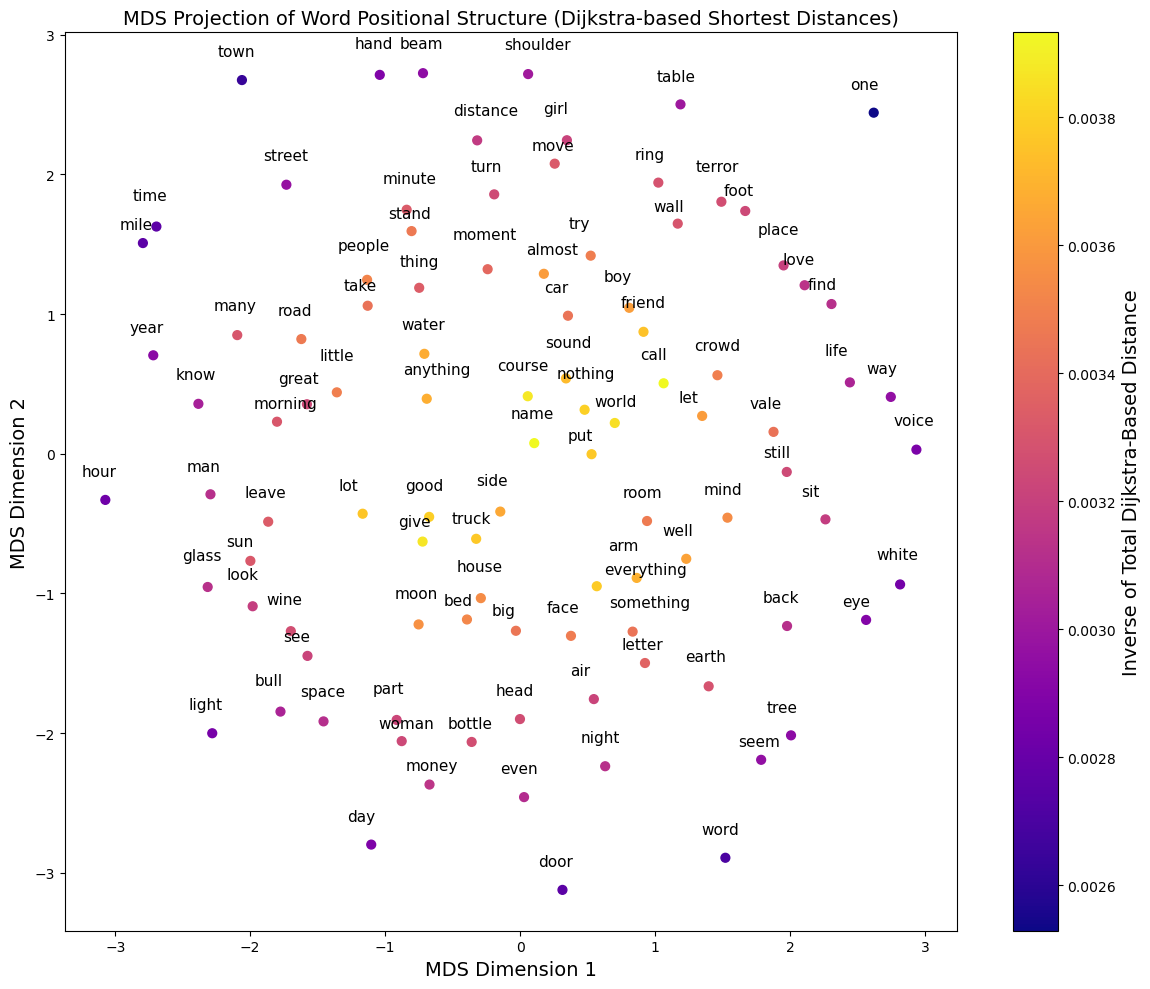

In [71]:
# Compute average local sentence distance for each pair of words in L
def compute_sentence_local_distance(L, all_sentences_2, default_distance=9999.0):
    """
    For each pair of words (w1, w2) in L, we only consider the cases where
    w1 and w2 BOTH appear in the same sentence. Within such a sentence,
    we measure the 'local distance' as the absolute difference of their 
    pos_in_sent indices. We average these local distances across all 
    sentences in which they co-occur.
    
    - If two words NEVER co-occur in any sentence, we assign distance=9999.0
      (or the specified default_distance).
    
    :param L: list of words (~100)
    :param all_sentences_2: The list of sentences, each is a list of tuples
            (lemma, unified_pos, sid, pos_in_sent, gpos).
    :param default_distance: The distance value for word pairs that never 
            appear in the same sentence.
    :return: dist_dict_sentence_local: A dict {(w1, w2): local_dist}, 
            storing the average local distance for each pair
    """
    # Sort the list L to have consistent ordering of words
    L_sorted = sorted(L)
    # Convert the sorted list into a set for quick membership checks
    word_set = set(L_sorted)
    
    # Create a dictionary to accumulate sum of distances for each pair
    pair_sum = defaultdict(float)
    # Create a dictionary to count the number of times each pair co-occurs
    pair_count = defaultdict(int)
    
    # Iterate over every sentence in all_sentences_2
    for sent in all_sentences_2:
        # Collect tokens relevant to L by checking if the lemma is in word_set
        relevant_tokens = []
        for (lemma, upos, sid, pos_in_sent, gpos) in sent:
            if lemma in word_set:
                relevant_tokens.append((lemma, pos_in_sent))
        
        # If fewer than two relevant tokens, no pairs can be formed
        if len(relevant_tokens) < 2:
            continue
        
        # Consider each unique pair of relevant tokens within this sentence
        for i in range(len(relevant_tokens)):
            for j in range(i+1, len(relevant_tokens)):
                # Unpack the lemma and pos_in_sent index for each token
                w1, pos_i = relevant_tokens[i]
                w2, pos_j = relevant_tokens[j]
                
                # Sort the pair alphabetically to treat (w1, w2) == (w2, w1)
                pair_key = tuple(sorted([w1, w2]))
                # Compute the local distance as absolute difference of pos_in_sent
                local_dist = abs(pos_i - pos_j)
                
                # Accumulate the sum of distances for this pair
                pair_sum[pair_key] += local_dist
                # Increase the co-occurrence count for this pair
                pair_count[pair_key] += 1
    
    # Create a dictionary to store the final average local distance
    dist_dict_sentence_local = {}
    # Double loop over words in L_sorted to define all possible pairs
    for w1 in L_sorted:
        for w2 in L_sorted:
            # Skip if w1 >= w2 to avoid duplicates and diagonal
            if w1 >= w2:
                continue
            pair_key = (w1, w2)
            # If the pair co-occurred at least once, compute the average distance
            if pair_key in pair_count:
                count_val = pair_count[pair_key]
                sum_val = pair_sum[pair_key]
                avg_local = sum_val / count_val
                dist_dict_sentence_local[pair_key] = avg_local
            else:
                # If the pair never co-occurred, assign the default large distance
                dist_dict_sentence_local[pair_key] = default_distance
    
    # Return the sentence-local distance dictionary
    return dist_dict_sentence_local

# Construct a graph from the local-distance dictionary to facilitate Dijkstra's shortest paths
def build_graph_from_dist_dict_dijkstra(L, dist_dict):
    """
    Given the set of words L and a 'dist_dict' mapping (w1, w2) -> distance,
    build an adjacency list for Dijkstra. For each pair (w1, w2) with distance d,
    we treat that as an undirected edge: w1->w2 with weight d, w2->w1 with weight d.
    """
    # Sort the list of words for consistent ordering
    L_sorted = sorted(L)
    # Convert the sorted list into a set for quick membership checks
    word_set = set(L_sorted)
    
    # Initialize a dictionary of dictionaries to represent adjacency
    graph_dijkstra = {w: {} for w in L_sorted}
    # Populate the adjacency data structure
    for (w1, w2), dist_val in dist_dict.items():
        # Only add if both w1 and w2 are in the set of words
        if w1 in word_set and w2 in word_set:
            graph_dijkstra[w1][w2] = dist_val
            graph_dijkstra[w2][w1] = dist_val
    
    # Return the adjacency list for the entire word set
    return graph_dijkstra

# Run Dijkstra from each word to all others, storing the shortest path distances in a dictionary
def dijkstra_all_pairs_dijkstra(graph_dijkstra, L):
    """
    Runs Dijkstra from each word in L to find shortest distances to all others.
    Returns dist_dict_dijkstra: {(w1, w2): shortest_dist}, storing pairs in sorted order.
    """
    # Initialize a dictionary for the final shortest distances across all pairs
    dist_dict_dijkstra = {}
    # Sort the list of words for consistent indexing
    L_sorted = sorted(L)

    # Perform Dijkstra from each word as a start node
    for start_word in L_sorted:
        # Create a dictionary holding distances from start_word to any other
        distances = {w: float('inf') for w in L_sorted}
        distances[start_word] = 0.0

        # Use a min-heap (priority queue) to store frontier nodes
        pq = [(0.0, start_word)]

        # While we still have nodes to explore in the priority queue
        while pq:
            # Extract the node with the smallest known distance
            current_dist, node = heapq.heappop(pq)
            # If we've popped a distance larger than the known best distance, skip it
            if current_dist > distances[node]:
                continue

            # Traverse neighbors of the current node
            for neighbor, edge_weight in graph_dijkstra[node].items():
                # Calculate a new potential distance to the neighbor
                new_dist = current_dist + edge_weight
                # If this new path is better, update and push into the queue
                if new_dist < distances[neighbor]:
                    distances[neighbor] = new_dist
                    heapq.heappush(pq, (new_dist, neighbor))

        # After finalizing distances from start_word, store them in the dictionary
        for other_word in L_sorted:
            if other_word == start_word:
                continue
            shortest_d = distances[other_word]
            if shortest_d < float('inf'):
                pair = tuple(sorted([start_word, other_word]))
                dist_dict_dijkstra[pair] = shortest_d

    # Return the dictionary of shortest distances for all pairs
    return dist_dict_dijkstra

# Print the top and bottom N pairs of words by their Dijkstra shortest path distances
def print_distance_results_df_dijkstra(dist_dict_dijkstra, top_n=5):
    """
    Prints the closest/furthest word pairs for Dijkstra-based shortest distances.
    Returns two DataFrames for possible reuse.
    """
    # If the dictionary is empty, we have no results
    if not dist_dict_dijkstra:
        print("No Dijkstra-based distance data computed.")
        return None, None

    # Convert dictionary to a list of (word1, word2, distance) records
    data = []
    for (w1, w2), dist_val in dist_dict_dijkstra.items():
        data.append({"Word 1": w1, "Word 2": w2, "Shortest Distance": dist_val})

    # Build a DataFrame and sort ascending by distance
    df_all = pd.DataFrame(data)
    df_all.sort_values(by="Shortest Distance", ascending=True, inplace=True)

    # Extract the top_n closest pairs and the bottom_n furthest pairs
    top_df_dijkstra = df_all.head(top_n).reset_index(drop=True)
    bottom_df_dijkstra = df_all.tail(top_n).reset_index(drop=True)

    # Print the top and bottom pairs
    print(f"\nClosest {top_n} pairs by Dijkstra shortest distance:")
    display(top_df_dijkstra.style.hide(axis="index"))

    print(f"\nFurthest {top_n} pairs by Dijkstra shortest distance:")
    display(bottom_df_dijkstra.style.hide(axis="index"))

    # Return references to both DataFrames
    return top_df_dijkstra, bottom_df_dijkstra

# Build a distance matrix for Dijkstra-based results, mirroring the approach for MDS usage
def build_distance_matrix_dijkstra(L, dist_dict_dijkstra, default_distance=9999.0):
    """
    Converts (w1,w2)->distance dict into a full NxN matrix for Dijkstra-based 
    shortest paths, mirroring the approach from M3.2.
    """
    # Sort the list of words for consistent indexing
    L_sorted = sorted(L)
    # Map each word to an index
    idx_map = {w: i for i, w in enumerate(L_sorted)}
    # Prepare the NxN matrix with a default fill value
    N = len(L_sorted)
    dist_mat_dijkstra = np.full((N, N), default_distance, dtype=float)
    # Set the diagonal to zero
    np.fill_diagonal(dist_mat_dijkstra, 0.0)

    # Populate the matrix with the known shortest distances
    for (w1, w2), dist_val in dist_dict_dijkstra.items():
        if w1 in idx_map and w2 in idx_map:
            i = idx_map[w1]
            j = idx_map[w2]
            dist_mat_dijkstra[i, j] = dist_val
            dist_mat_dijkstra[j, i] = dist_val

    # Return the matrix and the sorted word list
    return dist_mat_dijkstra, L_sorted

# Apply MDS to plot word relationships based on Dijkstra all-pairs shortest distances
def plot_mds_from_dijkstra(dist_dict_dijkstra, L, random_state=123):
    """
    Visualizes words using MDS from Dijkstra all-pairs shortest distances,
    with automatic label adjustment to reduce overlap (no arrows).
    """
    # Build a full distance matrix from the Dijkstra-based dictionary
    dist_mat_dijkstra, sorted_words_dijkstra = build_distance_matrix_dijkstra(
        L, dist_dict_dijkstra, default_distance=9999.0
    )

    # Apply MDS with the precomputed distance matrix
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state, normalized_stress='auto')
    coords_dijkstra = mds.fit_transform(dist_mat_dijkstra)

    # Compute row sums and closeness
    row_sums = np.where(dist_mat_dijkstra.sum(axis=1) == 0, 1e-6, dist_mat_dijkstra.sum(axis=1))
    closeness = 1 / row_sums

    # Create plot
    fig, ax = plt.subplots(figsize=(12, 10))
    sc = ax.scatter(
        coords_dijkstra[:, 0], coords_dijkstra[:, 1],
        c=closeness,
        cmap="plasma",
        s=40
    )

    # Offset values
    x_range = coords_dijkstra[:, 0].max() - coords_dijkstra[:, 0].min()
    y_range = coords_dijkstra[:, 1].max() - coords_dijkstra[:, 1].min()
    x_offset = x_range * -0.03
    y_offset = y_range * 0.025

    # Label placement
    texts = []
    for i, w in enumerate(sorted_words_dijkstra):
        x, y = coords_dijkstra[i]
        texts.append(ax.text(x + x_offset, y + y_offset, w, fontsize=11))

    # Automatically adjust label positions to reduce overlap (no arrows)
    adjust_text(texts, ax=ax, expand_text=(2.0, 2.0),)

    # Titles and colorbar
    ax.set_title("MDS Projection of Word Positional Structure (Dijkstra-based Shortest Distances)", fontsize=14)
    ax.set_xlabel("MDS Dimension 1", fontsize=14)
    ax.set_ylabel("MDS Dimension 2", fontsize=14)
    cb = plt.colorbar(sc, ax=ax)
    cb.set_label("Inverse of Total Dijkstra-Based Distance", fontsize=14)
    plt.tight_layout()
    plt.show()

# Compute the sentence-local distance for each pair in L
dist_dict_sentence_local = compute_sentence_local_distance(L, all_sentences_2, default_distance=9999.0)
# Build an undirected graph based on these local distances
graph_dijkstra = build_graph_from_dist_dict_dijkstra(L, dist_dict_sentence_local)
# Compute all-pairs shortest distances using Dijkstra
dist_dict_dijkstra = dijkstra_all_pairs_dijkstra(graph_dijkstra, L)

# Print the top and bottom word pairs in terms of Dijkstra shortest distance
print("\nDijkstra Shortest Distances (Sentence-Local Distances as Edges)")
top_df_dijkstra, bottom_df_dijkstra = print_distance_results_df_dijkstra(dist_dict_dijkstra, top_n=5)

# Inform the user about the MDS visualization
print("\nMDS Visualization of Word Relationships Based on Dijkstra Shortest Paths (Sentence-Local Distances):\n")

# Generate a scatter plot with MDS using the final Dijkstra-based distances
plot_mds_from_dijkstra(dist_dict_dijkstra, L, random_state=123)

#### Phase 5.2: Trace Semantic Connectivity Between Words with Dijkstra’s Path

We extract and display the shortest semantic path between two specific words within the Dijkstra-constructed co-occurrence graph.

We use a custom implementation of Dijkstra’s algorithm to compute the optimal path from a given source word (e.g., glass) to a target word (e.g., house), traversing edges that represent sentence-local proximity. The full path is reconstructed by backtracking from the destination node, and edge-wise distances are annotated along the way.

For interpretability, we highlight whether any link along the path uses the default penalty distance (e.g., 9999.0), indicating indirect or rare co-occurrence. The total path distance is also computed and displayed. This step allows us to inspect both direct and indirect lexical relationships and serves as a powerful tool for tracing how semantic information may propagate across sparse or fragmented textual contexts.

In [77]:
# Define a function to find the shortest path between two words using Dijkstra's algorithm
def find_dijkstra_path(glass, house, graph_dijkstra):
    """
    Trace the shortest path from glass to house using Dijkstra's algorithm,
    and list intermediate steps only if the sentence-local distance was 9999.
    """
    import heapq

    # Initialize distance and predecessor maps
    distances = {w: float('inf') for w in graph_dijkstra}
    prev = {w: None for w in graph_dijkstra}
    distances[glass] = 0.0

    # Initialize priority queue with the source node
    pq = [(0.0, glass)]

    # Perform Dijkstra's algorithm
    while pq:
        curr_dist, node = heapq.heappop(pq)
        if curr_dist > distances[node]:
            continue
        for neighbor, edge_w in graph_dijkstra[node].items():
            alt = curr_dist + edge_w
            if alt < distances[neighbor]:
                distances[neighbor] = alt
                prev[neighbor] = node
                heapq.heappush(pq, (alt, neighbor))

    # Handle the case where the target is unreachable
    if distances[house] == float('inf'):
        print(f"No path from '{glass}' to '{house}' exists in Dijkstra graph.")
        return None

    # Reconstruct the shortest path from house back to glass
    path = []
    current = house
    while current is not None:
        path.append(current)
        current = prev[current]
    path = path[::-1]

    # Print the full shortest path
    print(f"Dijkstra path from '{glass}' to '{house}':")
    print(" → ".join(path))
    print("\nPath details with sentence-local distances:")

    # Compute and display the local distances along the path
    total_distance = 0.0
    for i in range(len(path) - 1):
        w1, w2 = sorted((path[i], path[i + 1]))
        local_dist = dist_dict_sentence_local.get((w1, w2), 9999.0)
        print(f"  {path[i]} → {path[i+1]} : distance = {local_dist}")
        total_distance += local_dist

    # Print the total accumulated sentence-local distance for the path
    print(f"\n Total Dijkstra distance from '{glass}' to '{house}': {total_distance:.2f}")

# Run the path-finding function on an example word pair
find_dijkstra_path("glass", "house", graph_dijkstra)

Dijkstra path from 'glass' to 'house':
glass → anything → house

Path details with sentence-local distances:
  glass → anything : distance = 2.0
  anything → house : distance = 1.0

 Total Dijkstra distance from 'glass' to 'house': 3.00


### Phase 6: Dijkstra-Based Clustering Evaluation

We perform clustering analyses based on Dijkstra-computed shortest path distances between words, reflecting sentence-local semantic proximity within the corpus.

We first build a Dijkstra-based distance matrix that captures the global shortest distances between all word pairs. After applying min-max normalization, we explore two clustering strategies. We apply hierarchical clustering using single, complete, and average linkage methods, and evaluate the clustering quality using silhouette scores. Words are projected into two-dimensional space via Multidimensional Scaling (MDS) for visualization, with points colored by their cluster assignments. In addition, as an exploratory analysis, we perform K-Means clustering on the MDS-projected coordinates over a range of cluster numbers (k = 3 to 10). Inertia and silhouette scores are used to evaluate the compactness and separability of the resulting clusters.


Evaluating Hierarchical Clustering using Single Linkage with k=5 (Dijkstra-based):


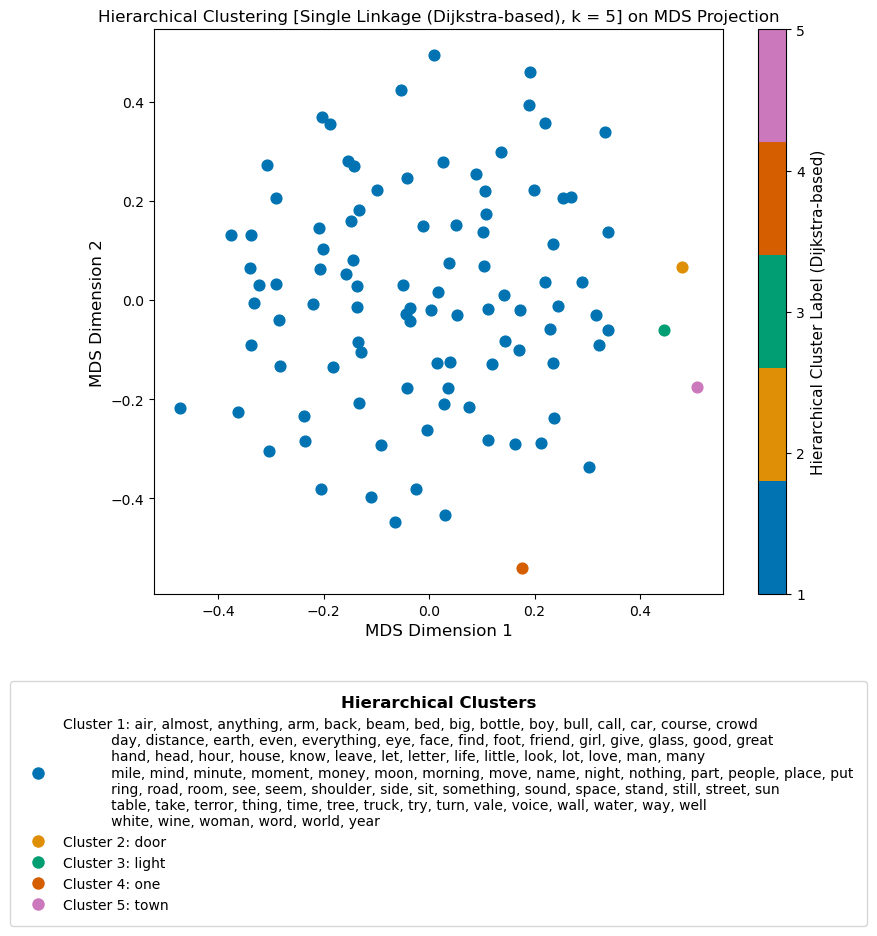


Evaluating Hierarchical Clustering using Complete Linkage with k=5 (Dijkstra-based):


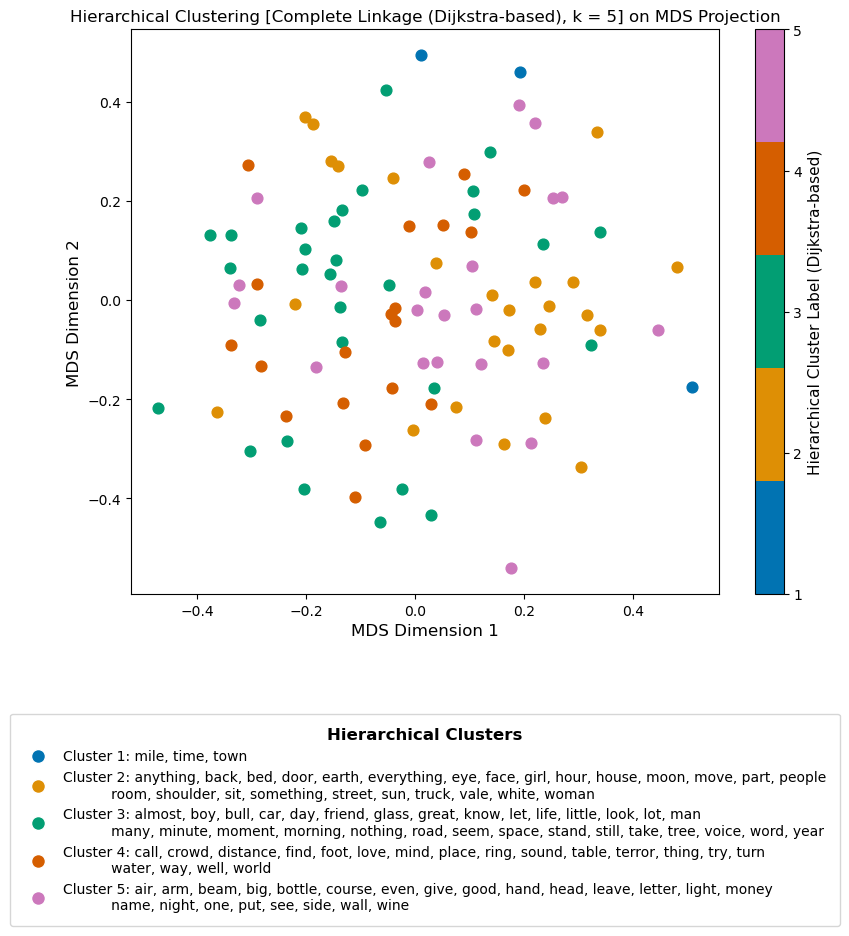


Evaluating Hierarchical Clustering using Average Linkage with k=5 (Dijkstra-based):


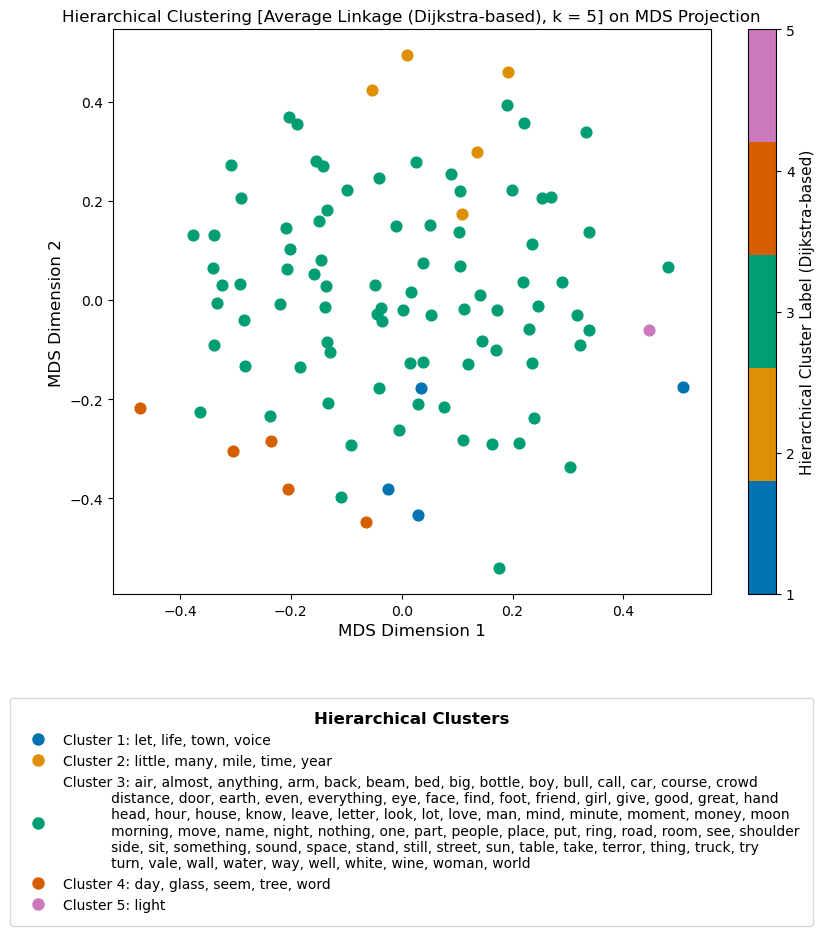


Hierarchical Clustering Evaluation Summary (Dijkstra-based):


Linkage Method  Silhouette Score
0       complete            0.0671
1        average            0.0616
2         single           -0.0252

Optimal Linkage for Hierarchical = complete (Silhouette Score = 0.0671)
--------------------------------------------------------------------------------

K-Means on MDS with k=3 (Dijkstra-based distances):



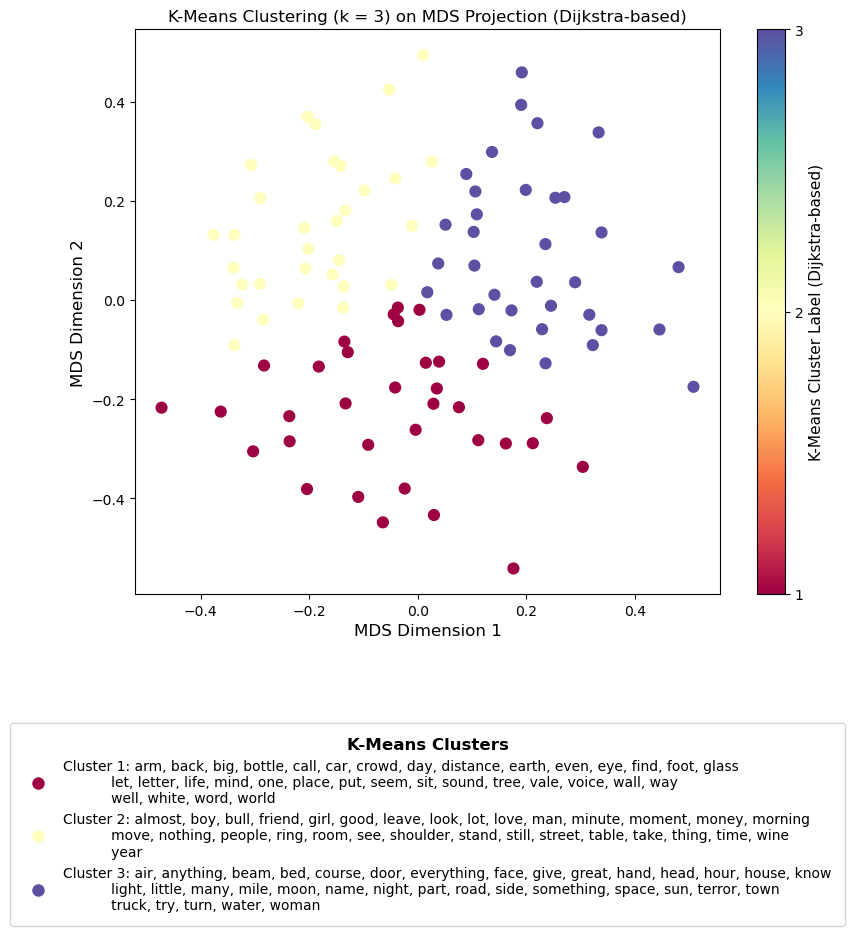


K-Means on MDS with k=4 (Dijkstra-based distances):



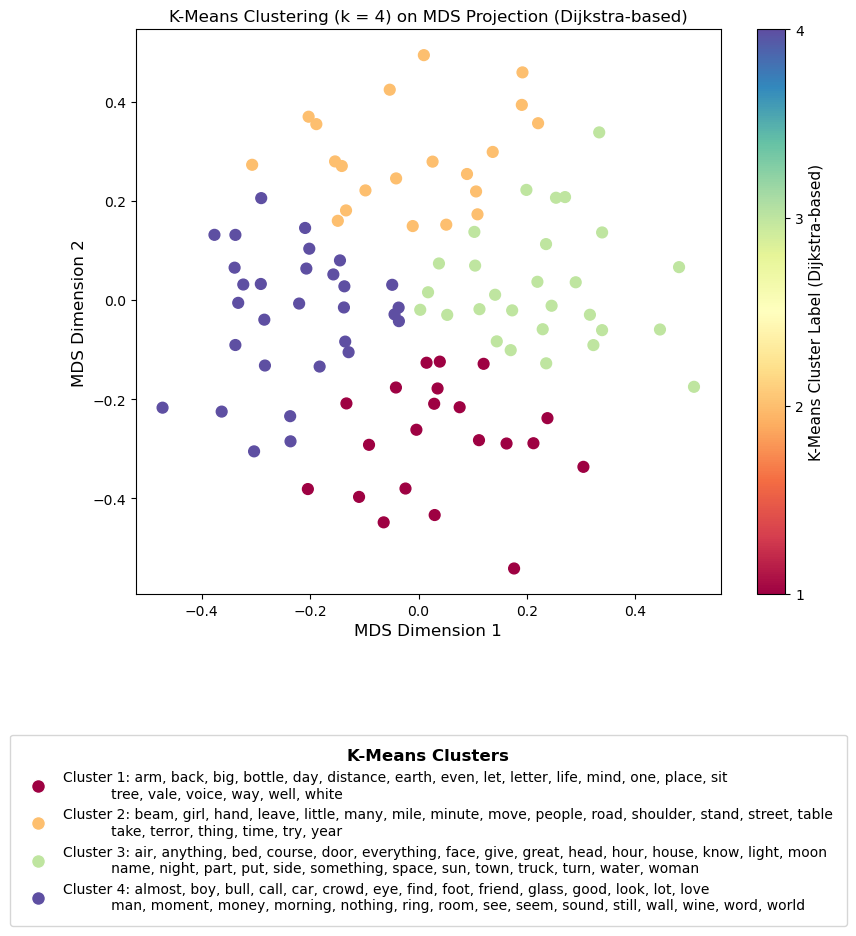


K-Means on MDS with k=5 (Dijkstra-based distances):



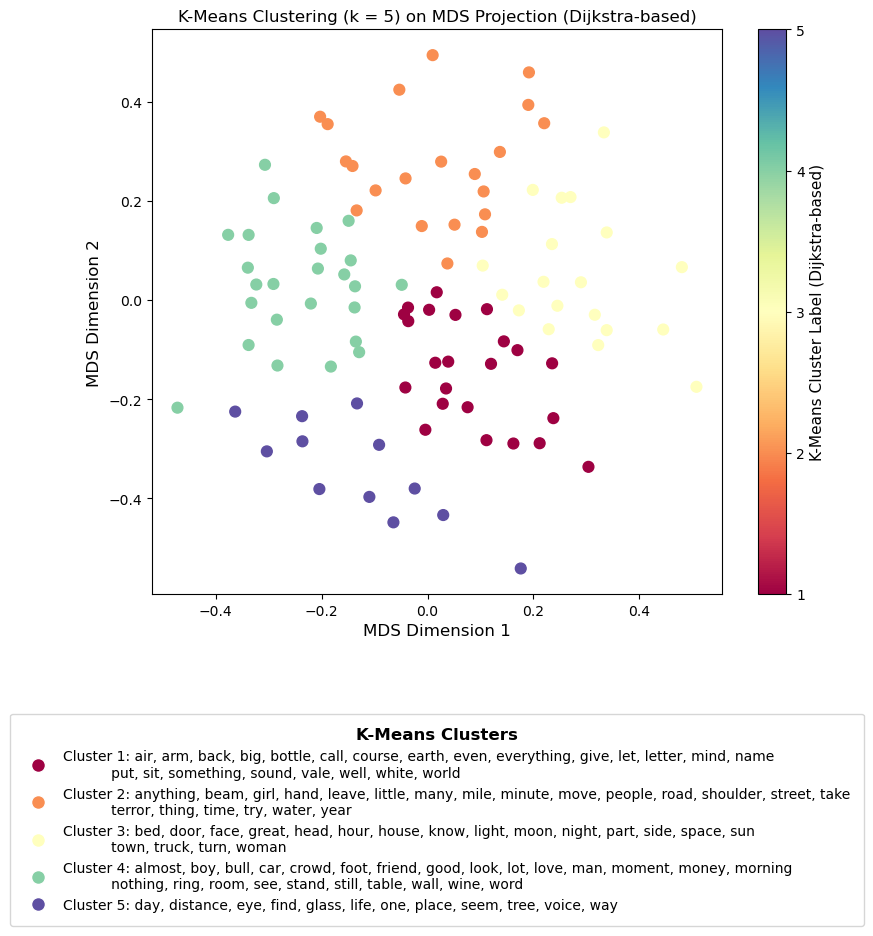


K-Means on MDS with k=6 (Dijkstra-based distances):



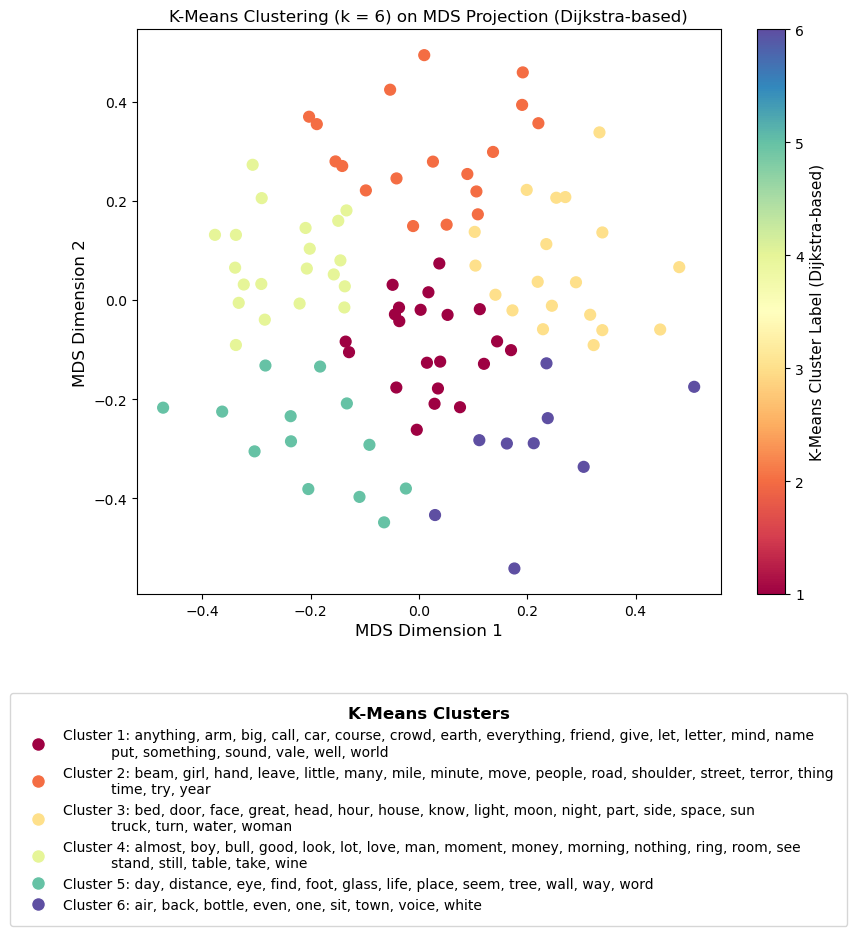


K-Means on MDS with k=7 (Dijkstra-based distances):



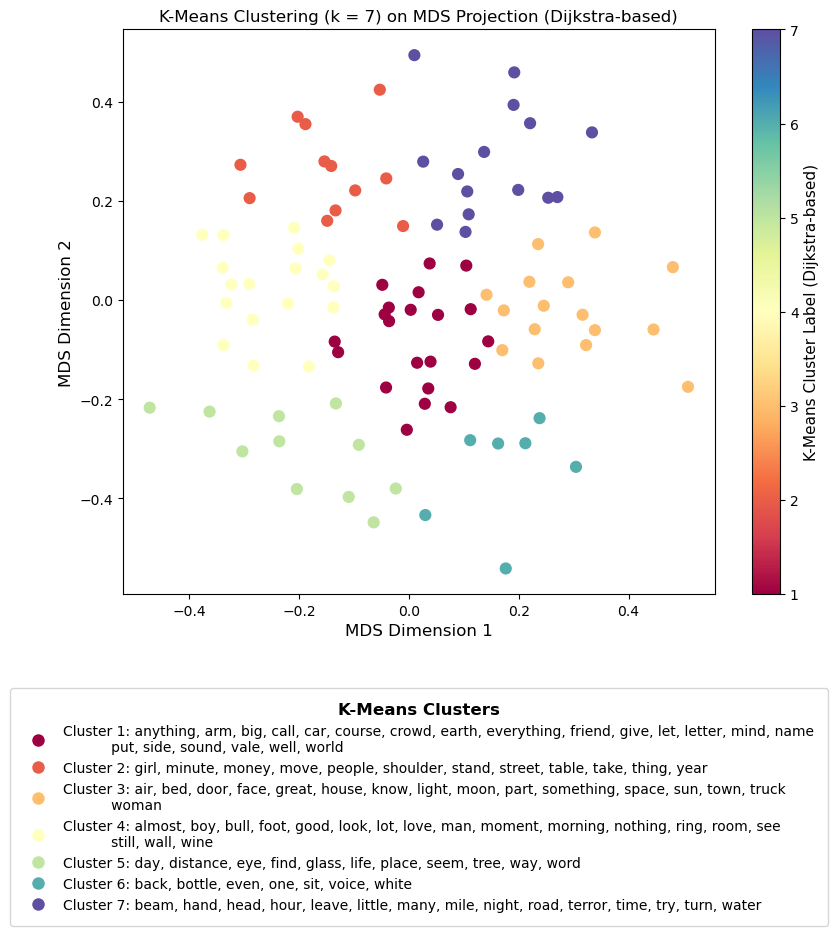


K-Means on MDS with k=8 (Dijkstra-based distances):



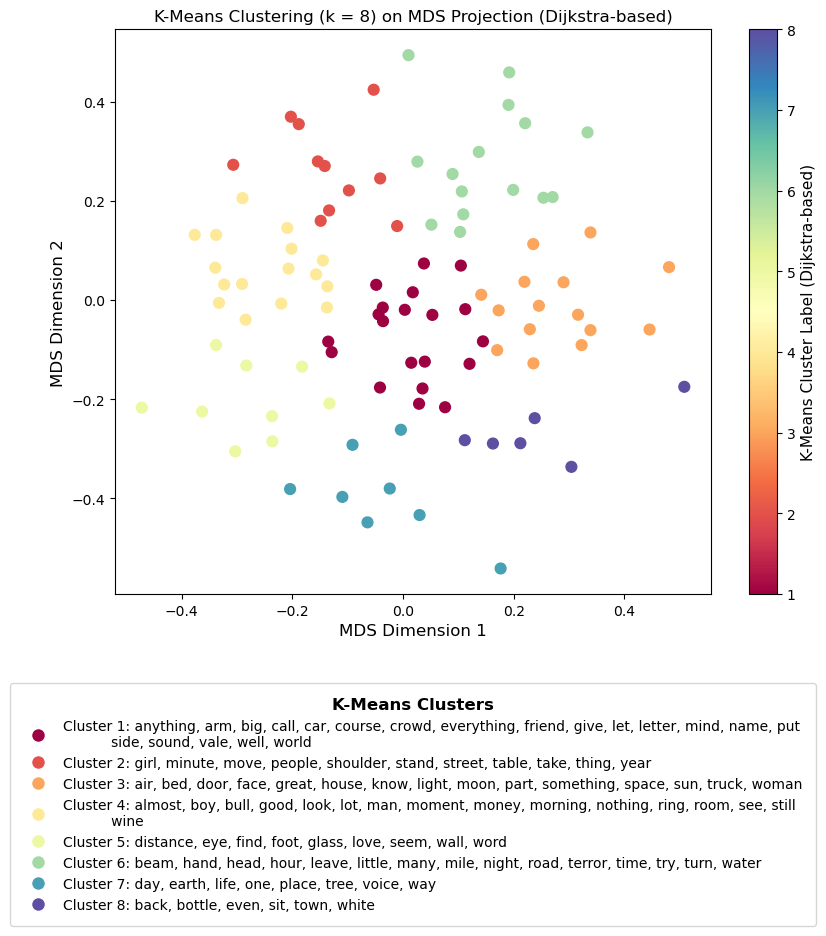


K-Means on MDS with k=9 (Dijkstra-based distances):



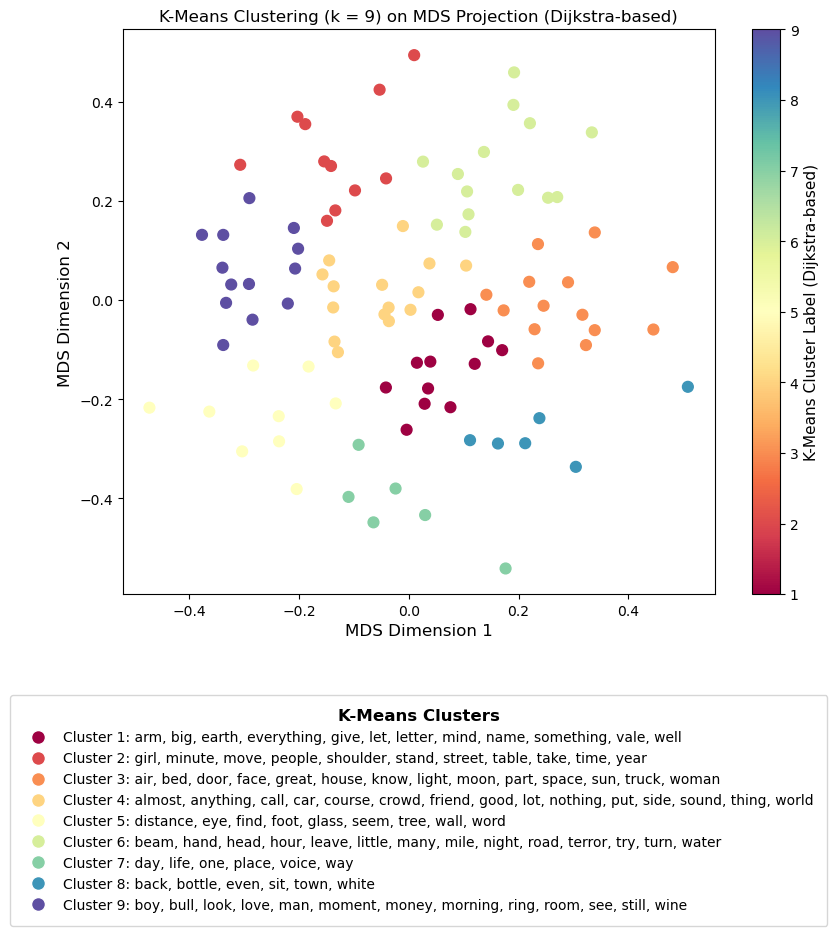


K-Means on MDS with k=10 (Dijkstra-based distances):



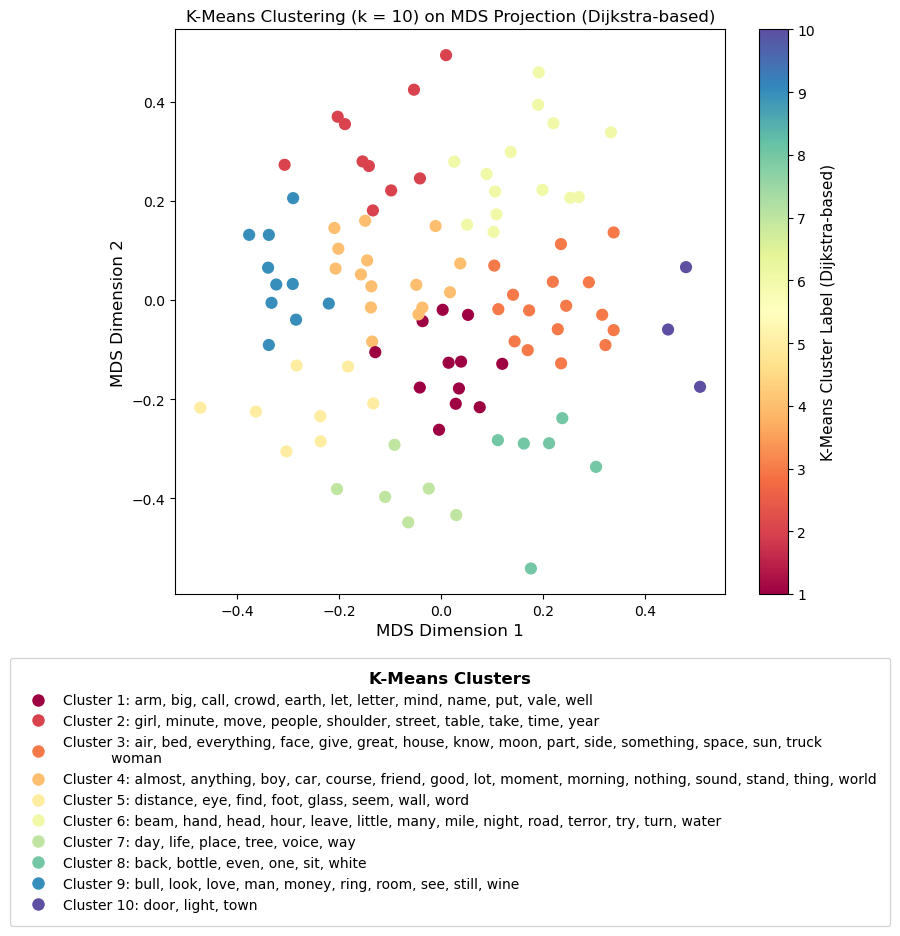

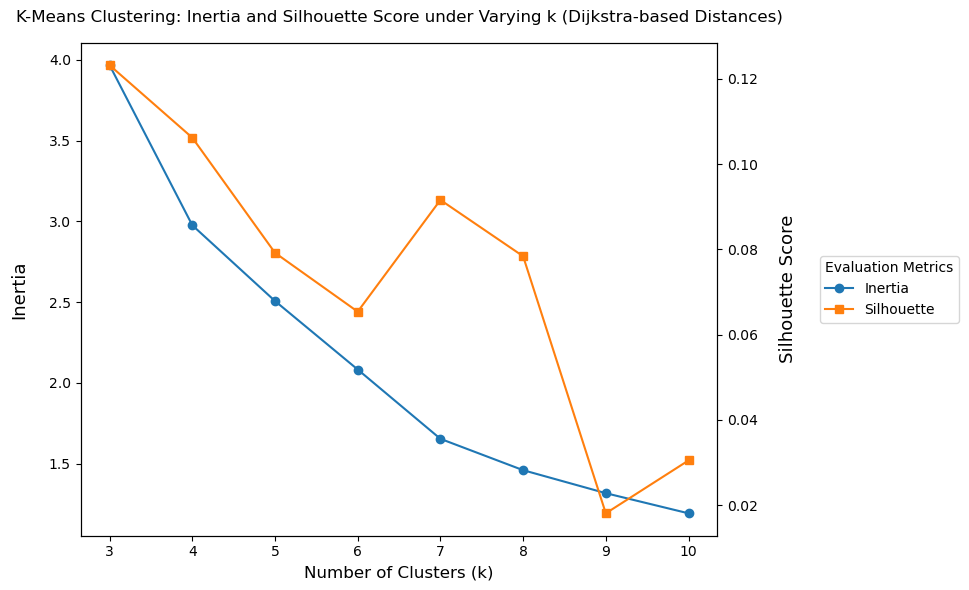


K-Means Evaluation Summary (Dijkstra-based):


k  Inertia  Silhouette Score
0   3   3.9661            0.1232
1   4   2.9757            0.1062
2   5   2.5070            0.0792
3   6   2.0831            0.0654
4   7   1.6542            0.0916
5   8   1.4602            0.0784
6   9   1.3178            0.0181
7  10   1.1932            0.0305

Optimal k for K-Means = 3 (Silhouette Score=0.1232)


In [79]:
# Normalize the Dijkstra-based distance matrix into [0, 1] by min-max scaling
def normalize_distance_matrix_dijkstra(dist_mat):
    """
    Performs min-max normalization on the distance matrix, mapping non-diagonal
    entries into the [0, 1] range. Diagonal values remain 0.0.
    """
    # Create a copy of the matrix to avoid altering the original
    dist_copy = dist_mat.copy()
    # Build a mask that indicates nonzero cells (ignoring diagonal zeros)
    mask = dist_copy != 0.0
    
    # Determine the minimum value among all nonzero distances
    min_val = dist_copy[mask].min()
    # Determine the maximum value among all nonzero distances
    max_val = dist_copy[mask].max()
    
    # Compute the range of values, protecting against identical min and max
    range_val = (max_val - min_val) if max_val > min_val else 1.0
    # Apply the min-max formula to scale into [0, 1]
    norm_mat = (dist_copy - min_val) / range_val
    # For any masked-out entry, keep it at 0.0
    norm_mat[~mask] = 0.0
    # Return the normalized matrix
    return norm_mat

# Build an NxN distance matrix from the Dijkstra-based distance dictionary
def build_distance_matrix_dijkstra(L, dist_dict_dijkstra, default_distance=9999.0):
    """
    Builds an NxN distance matrix from a dictionary of Dijkstra-based distances.
    """
    # Sort the list of words for consistent indexing
    L_sorted = sorted(L)
    # Determine the number of words exist
    N = len(L_sorted)
    
    # Build a map to locate each word's row/column index
    word_index_map_dijkstra = {w: i for i, w in enumerate(L_sorted)}
    # Initialize the distance matrix with a default fill value
    dist_mat_dijkstra = np.full((N, N), default_distance, dtype=float)
    # Set diagonal entries to 0.0
    np.fill_diagonal(dist_mat_dijkstra, 0.0)

    # Populate the matrix from the dictionary entries
    for (w1, w2), dist_val in dist_dict_dijkstra.items():
        if w1 in word_index_map_dijkstra and w2 in word_index_map_dijkstra:
            i = word_index_map_dijkstra[w1]
            j = word_index_map_dijkstra[w2]
            dist_mat_dijkstra[i, j] = dist_val
            dist_mat_dijkstra[j, i] = dist_val

    # Return the matrix and the index map
    return dist_mat_dijkstra, word_index_map_dijkstra

# Apply hierarchical clustering on the Dijkstra-based distance matrix and shows an MDS plot
def plot_mds_with_hierarchical_labels_dijkstra(dist_mat_dijkstra, L, linkage_method="average", num_clusters=5, random_state=42):
    """
    Applies Multidimensional Scaling (MDS) to the Dijkstra-based distance matrix,
    then performs hierarchical clustering on the condensed distances, and plots
    the words in 2D with each cluster labeled and color-coded.
    """
    # Create an MDS model that interprets dist_mat_dijkstra as a precomputed distance matrix
    mds_model = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state, normalized_stress='auto')
    # Fit the MDS model and collect 2D coordinates
    coords = mds_model.fit_transform(dist_mat_dijkstra)

    # Convert the NxN matrix into a condensed format for hierarchical linkage
    condensed = squareform(dist_mat_dijkstra, checks=False)
    # Perform hierarchical clustering with the chosen method
    Z = linkage(condensed, method=linkage_method)
    # Extract cluster labels ranging from 1..num_clusters
    cluster_labels_dijkstra = fcluster(Z, t=num_clusters, criterion='maxclust')

    # Group words by their assigned cluster
    cluster_to_words = defaultdict(list)
    for i, lbl in enumerate(cluster_labels_dijkstra):
        cluster_to_words[lbl].append(L[i])

    # Create a discrete color palette
    palette = sns.color_palette("colorblind", n_colors=num_clusters)
    # Wrap the palette in a ListedColormap
    cmap = ListedColormap(palette)

    # Set up a figure for the scatter plot
    fig, ax = plt.subplots(figsize=(9, 10))
    # For each cluster ID, plot its words in the same color
    for c_id in sorted(cluster_to_words):
        idxs = [i for i, lbl in enumerate(cluster_labels_dijkstra) if lbl == c_id]
        cluster_coords = coords[idxs]
        ax.scatter(cluster_coords[:, 0], cluster_coords[:, 1], c=[cmap(c_id - 1)], s=60)

    # Label the plot's title and axes
    ax.set_title(f"Hierarchical Clustering [{linkage_method.capitalize()} Linkage (Dijkstra-based), k = {num_clusters}] on MDS Projection", fontsize=12)
    ax.set_xlabel("MDS Dimension 1", fontsize=12)
    ax.set_ylabel("MDS Dimension 2", fontsize=12)

    # Build a colorbar from 1..num_clusters
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=1, vmax=num_clusters), cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm, ticks=range(1, num_clusters + 1), ax=ax)
    cbar.set_label("Hierarchical Cluster Label (Dijkstra-based)", fontsize=11)

    # Create handles for the legend by constructing textual labels for each cluster's words
    handles = []
    for cluster_id in sorted(cluster_to_words):
        words = cluster_to_words[cluster_id]
        color = cmap(cluster_id - 1)
        prefix = f"Cluster {cluster_id}: "
        lines = [prefix + ', '.join(words[:15])]
        indent = ' ' * len(prefix)
        for i in range(15, len(words), 15):
            lines.append(indent + ', '.join(words[i:i+15]))
        label = '\n'.join(lines)
        marker = Line2D([0], [0], marker='o', color='w',
                        markerfacecolor=color, markersize=10, label=label)
        handles.append(marker)

    # Place the legend below the plot
    legend = ax.legend(
        handles=handles,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.6),
        fontsize=10,
        frameon=True,
        fancybox=True,
        borderpad=1.0,
        ncol=1,
        title="Hierarchical Clusters"
    )
    legend.get_title().set_fontsize(12)
    legend.get_title().set_fontweight('bold')

    # Adjust layout and final rendering
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.4)
    plt.show()

    # Return the cluster labels for potential further analysis
    return cluster_labels_dijkstra

# Apply K-Means to the Dijkstra-based distance matrix after MDS projection and plots the labeled scatter
def plot_mds_kmeans_with_legend_dijkstra(dist_mat_dijkstra, L, k=5, random_state=42):
    """
    Applies MDS to the Dijkstra-based distance matrix, then uses K-Means to
    cluster the 2D coordinates. The resulting clusters are visualized with
    a color-coded scatter plot and a legend listing the words in each cluster.
    """
    # Create and fit the MDS model on the Dijkstra-based distance matrix
    mds_model = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state, normalized_stress='auto')
    coords = mds_model.fit_transform(dist_mat_dijkstra)

    # Perform K-Means on the resulting 2D coordinates
    kmeans_model = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
    labels_dijkstra = kmeans_model.fit_predict(coords) + 1

    # Prepare a color palette and build a ListedColormap
    palette = sns.color_palette("Spectral", n_colors=k)
    cmap = ListedColormap(palette)

    # Build the figure and scatter plot
    fig, ax = plt.subplots(figsize=(9, 10))
    sc = ax.scatter(coords[:, 0], coords[:, 1], c=labels_dijkstra, cmap="Spectral", s=60, vmin=1, vmax=k)

    # Label plot and axes
    ax.set_title(f"K-Means Clustering (k = {k}) on MDS Projection (Dijkstra-based)", fontsize=12)
    ax.set_xlabel("MDS Dimension 1", fontsize=12)
    ax.set_ylabel("MDS Dimension 2", fontsize=12)

    # Create a colorbar to match the cluster labels
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(1, k), cmap="Spectral")
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, ticks=range(1, k + 1))
    cbar.set_label("K-Means Cluster Label (Dijkstra-based)", fontsize=11)

    # Build a mapping from cluster label to words
    cluster_to_words = defaultdict(list)
    for i, lbl in enumerate(labels_dijkstra):
        cluster_to_words[lbl].append(L[i])

    # Create handles for the legend
    handles = []
    for cluster_id in sorted(cluster_to_words):
        color = sc.cmap(sc.norm(cluster_id))
        words = cluster_to_words[cluster_id]
        prefix = f"Cluster {cluster_id}: "
        lines = [prefix + ', '.join(words[:15])]
        indent = ' ' * len(prefix)
        for i in range(15, len(words), 15):
            lines.append(indent + ', '.join(words[i:i+15]))
        label = '\n'.join(lines)
        marker = Line2D([0], [0], marker='o', color='w',
                        markerfacecolor=color, markersize=10, label=label)
        handles.append(marker)

    # Place legend below the plot with relevant styling
    legend = ax.legend(
        handles=handles,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.6),
        fontsize=10,
        frameon=True,
        fancybox=True,
        borderpad=1.0,
        ncol=1,
        title="K-Means Clusters"
    )
    legend.get_title().set_fontsize(12)
    legend.get_title().set_fontweight('bold')

    # Tidy up the layout and display
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.4)
    plt.show()

    # Return the cluster labels for possible additional analysis
    return labels_dijkstra

# Explore both hierarchical and K-Means clustering on the Dijkstra-based distance matrix
def explore_kmeans_variations_dijkstra(dist_mat_dijkstra, L, k_values=range(3, 11), random_state=42):
    """
    Explores hierarchical clustering with different linkages (single, complete,
    average) at a fixed k=5, and then K-Means for k in a specified range.
    Shows the resulting plots and prints evaluation metrics such as silhouette.
    """
    # Prepare a list for hierarchical clustering results
    hierarchical_scores_dijkstra = []
    # Define which linkage methods to compare
    linkages = ["single", "complete", "average"]

    # Evaluate each hierarchical linkage approach
    for method in linkages:
        print(f"\nEvaluating Hierarchical Clustering using {method.capitalize()} Linkage with k=5 (Dijkstra-based):")
        cluster_labels_dijkstra = plot_mds_with_hierarchical_labels_dijkstra(
            dist_mat_dijkstra, L, linkage_method=method, num_clusters=5, random_state=random_state
        )
        s_score = silhouette_score(dist_mat_dijkstra, cluster_labels_dijkstra, metric='precomputed')
        hierarchical_scores_dijkstra.append((method, s_score))

    # Build a DataFrame to compare linkages
    df_hier_dijkstra = pd.DataFrame(hierarchical_scores_dijkstra, columns=["Linkage Method", "Silhouette Score"])
    df_hier_dijkstra = df_hier_dijkstra.round(4).sort_values(by="Silhouette Score", ascending=False).reset_index(drop=True)
    print("\nHierarchical Clustering Evaluation Summary (Dijkstra-based):")
    display(df_hier_dijkstra)

    # Print the best linkage result
    best_linkage_dijkstra = df_hier_dijkstra.loc[0, "Linkage Method"]
    best_linkage_score_dijkstra = df_hier_dijkstra.loc[0, "Silhouette Score"]
    print(f"Optimal Linkage for Hierarchical = {best_linkage_dijkstra} (Silhouette Score = {best_linkage_score_dijkstra})")
    print("-" * 80)

    # Prepare lists to track inertia and silhouette for K-Means
    inertia_list_dijkstra = []
    silhouette_list_dijkstra = []
    # Enable interactive plotting mode for inline figure display
    plt.ion()

    # Loop over different k values for K-Means
    for k in k_values:
        print(f"\nK-Means on MDS with k={k} (Dijkstra-based distances):\n")
        labels_dijkstra = plot_mds_kmeans_with_legend_dijkstra(dist_mat_dijkstra, L, k=k, random_state=random_state)
        s_score = silhouette_score(dist_mat_dijkstra, labels_dijkstra, metric='precomputed')

        # Build a new MDS model for the same distance matrix
        mds_model = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state, normalized_stress='auto')
        coords_dijkstra = mds_model.fit_transform(dist_mat_dijkstra)
        # Fit K-Means on these 2D coords to compute inertia in the 2D space
        km_dijkstra = KMeans(n_clusters=k, random_state=random_state, n_init='auto').fit(coords_dijkstra)
        inertia_val_dijkstra = km_dijkstra.inertia_

        inertia_list_dijkstra.append(inertia_val_dijkstra)
        silhouette_list_dijkstra.append(s_score)

    # Disable interactive plotting
    plt.ioff()

    # Create a DataFrame with the inertia and silhouette results for different k
    df_kmeans_dijkstra = pd.DataFrame({
        "k": list(k_values),
        "Inertia": inertia_list_dijkstra,
        "Silhouette Score": silhouette_list_dijkstra
    })
    df_kmeans_dijkstra = df_kmeans_dijkstra.round(4).sort_values(by="k").reset_index(drop=True)

    # Create a figure to show the inertia and silhouette side by side
    fig, ax1 = plt.subplots(figsize=(10, 6))
    color_inertia = "C0"
    ln1 = ax1.plot(df_kmeans_dijkstra["k"], df_kmeans_dijkstra["Inertia"], marker='o', color=color_inertia, label="Inertia")
    ax1.set_xlabel("Number of Clusters (k)", fontsize=12)
    ax1.set_ylabel("Inertia", color="black", fontsize=13, labelpad=15)
    ax1.tick_params(axis='y', labelcolor="black")

    # Add a second axis to show silhouette scores
    ax2 = ax1.twinx()
    color_sil = "C1"
    ln2 = ax2.plot(df_kmeans_dijkstra["k"], df_kmeans_dijkstra["Silhouette Score"], marker='s', color=color_sil, label="Silhouette")
    ax2.set_ylabel("Silhouette Score", color="black", fontsize=13, labelpad=15)
    ax2.tick_params(axis='y', labelcolor="black")

    plt.title("K-Means Clustering: Inertia and Silhouette Score under Varying k (Dijkstra-based Distances)", fontsize=12, pad=15)
    lns = ln1 + ln2
    labs = [l.get_label() for l in lns]
    legend = ax2.legend(
        lns, labs,
        loc='center left',
        bbox_to_anchor=(1.15, 0.5),
        title="Evaluation Metrics",
        fontsize=10,
        title_fontsize=10
    )
    legend._legend_box.align = "left"
    plt.tight_layout()
    plt.show()

    print("\nK-Means Evaluation Summary (Dijkstra-based):")
    display(df_kmeans_dijkstra)

    # Identify the best k by maximizing the silhouette score
    best_row_idx_dijkstra = df_kmeans_dijkstra["Silhouette Score"].idxmax()
    best_k_dijkstra = df_kmeans_dijkstra.loc[best_row_idx_dijkstra, "k"]
    best_k_sil_dijkstra = df_kmeans_dijkstra.loc[best_row_idx_dijkstra, "Silhouette Score"]
    print(f"Optimal k for K-Means = {best_k_dijkstra} (Silhouette Score={best_k_sil_dijkstra})")

# Entry point for the Dijkstra-based clustering analysis
if __name__ == "__main__":
    # Build a Dijkstra-based distance matrix from the global dist_dict_dijkstra
    dist_mat_dijkstra, word_index_map_dijkstra = build_distance_matrix_dijkstra(
        L,
        dist_dict_dijkstra,
        default_distance=9999.0
    )
    # Normalize the resulting distance matrix into [0, 1]
    dist_mat_dijkstra = normalize_distance_matrix_dijkstra(dist_mat_dijkstra)

    # Explore hierarchical clustering (with multiple linkage methods) and K-Means for a range of k
    explore_kmeans_variations_dijkstra(dist_mat_dijkstra, sorted(L), k_values=range(3, 11), random_state=42)